<a href="https://colab.research.google.com/github/t0wgster/Repo_ModEng/blob/main/ModelEngineering_akt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 General Information

**Case description: **

As a data science consultant, you are invited to work on a project within Berlin’s red-cross rescue service. The HR planning struggles with the current standby-duty plan. They ask for your expertise on predictive models in order
to improve the current planning logic.  



Every day a certain number of rescue drivers are on duty. However, due to short-term sickness of rescue drivers or an unusual amount of emergency calls often more drivers are needed than initially expected.  Hence, a certain
number of standby-drivers are kept “on hold” and activated when needed. Therefore, in the current approach <font color='blue'>90 rescue drivers</font> are daily kept on standby.  

As colleagues from the planning claim, there are seasonal patterns - for instance, during winter months more rescue drivers call sick – which are not incorporated into the current approach. Moreover, sometimes there are not enough rescue drivers even when all 90 standby-drivers are activated so that drivers are called for work even on their days off.

It is important to know, that the duty plan must be finished on the 15th of the current month for the upcoming
month. This means, for instance, that the duty plan for November must be finished on the 15th of October.    

**Project Aim: **

*Help the HR department with planning to estimate the amount of daily standby rescue drivers via a prediction model more efficiently. Here, efficient means that the percentage of standbys being activated is higher than in the current approach of keeping 90 drivers on hold. It also means that situations with not enough standbys should occur less often than in the current approach. Note that the plan must be finished on the 15th of the current month for the upcoming month. *

**Data Set: **

The data set and all relevant information from the business side (sickness dataset, number of emergency calls per
day) are given in a separate *.zip folder, which is available in myCampus, under the section Case Study.

**Task Description: **

The task consists of both coding and conceptual steps. Here is a list of tasks, which should be included in your
final document:  

● Structure the project via the CRISP-DM or Team DS methodologies and give a recommendation of how a git
repository for the project could look like. Note that you do not have to structure your final code according to
your git-repository proposal.

● Assess the quality of the provided data set. Prepare and visualize your findings of the initial data analysis
in order that business stakeholders can understand them in a clear and easy way.  

● Provide a baseline model as well as an accurate predictive model, which fulfils business requirements,
i.e. the amount of activated standby-drivers is maximized, but having not enough standbys is minimized.  

● In order that the business places confidence in your model, discuss the importance of the individual features
and make the results of the model interpretable. Moreover, a sophisticated error analysis is very important
for the business to understand the cases in which your approach could potentially fail.  

● In the last step of the project, give a proposal of how your model could be used by the business in everyday
work, for instance, via a graphical user interface (GUI).

● Finally, do not forget to attach the code to the final submission document.

# 0.1. Dataset Information

 Column Description:

• date: entry date

• n_sick: number of drivers called sick on duty

• calls: number of emergency calls

• n_duty: number of drivers on duty available

• n_sby: number of standby resources available

• sby_need: number of standbys, which are activated on a given day

• dafted: number of additional drivers needed due to not enough standbys

 Additional Info from Business Side

• Business claims, that having a daily fixed number of standbys (n_sby = 90) is not efficient because there are days with too many standbys followed by days with not enough standbys. The business aims at a more dynamical standby allocation, which takes seasonal patterns into account.  

• Most important, the model should minimize dates with not enough standby drivers at hand!


# 0.2. Import Libraries and Frameworks

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtype

In [ ]:
#handling datetime data
from datetime import datetime as dt
from datetime import timedelta, datetime
import datetime

#visualisation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

#data handling and processing
import numpy as np
import pandas as pd
from scipy import stats
import re

#data transformation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#data science
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import GridSearchCV

#grid search
import sklearn as sk

# 0.3. Helpful Libraries

In [ ]:
#general information about columns of a dataframe
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

#split date column into year, month and day

def split_date_day(date_string):
  return date_string.split("-")[-1]

def split_date_year(date_string):
  return date_string.split("-")[0]

def split_date_month(date_string):
  return date_string.split("-")[1]

def one_hot_encoding(df, columns_onehot):
    df = df.copy()
    df=pd.get_dummies(df, columns=columns_onehot)
    return df

def set_y_scale(n, ax):
  if n%4==0:
    ax.set_ylim(0, 100)
  elif n%4==1:
    ax.set_ylim(0, 10000)
  elif n%4==2:
    ax.set_ylim(0, 2000)
  elif n%4==3:
    ax.set_ylim(0, 220)

def train_test_split_tfdf(dataset, test_ratio=0.2):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

def df_week_columns(df):
  weekofyear_array=[]
  for cell in df.date:
    weekofyear=cell.to_pydatetime().isocalendar()[1]
    weekofyear_array.append(weekofyear)
  df['weekofyear']=weekofyear_array

  #create day of week colum
  df["date_weekday"]=df["date"].dt.dayofweek
  df["date_weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], inplace=True)

  #create colum day of week with week of year
  weekday_weekofyear_array=[]
  for n, cell in enumerate(df.weekofyear):
    weekday_weekofyear=f"{df.date_weekday[n]} {cell}"
    weekday_weekofyear_array.append(weekday_weekofyear)
  df["weekday_weekofyear"]=weekday_weekofyear_array

  return df

def df_split_date_column(df):
  df['day']=df['date_str'].apply(split_date_day)
  df['month']=df['date_str'].apply(split_date_month)
  df['year']=df['date_str'].apply(split_date_year)

def df_convert_month_column(df):
  df["month_int"]=df["month"].astype('int64')
  df["month"].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ],
   ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ], inplace=True)

def df_process_date_features(df):
  df=df_week_columns(df)
  df=df_convert_month_column(df)

def visualize_calls_sby_need_2(df_dict, year_array, weekofyear_start=1, weekofyear_end=52):
  # fix second y scale

  fig, hosts = plt.subplots(len(year_array),1, figsize = (25,12))

  fig.suptitle(f'Standby Driver and Emergency call overview for Week of year {weekofyear_start} to {weekofyear_end}', fontsize=25)

  for n, year in enumerate(year_array):

    df_visu=df_dict[year].loc[(df_dict[year]['weekofyear']>(weekofyear_start-1))&(df_dict[year]['weekofyear']<(weekofyear_end+1))]

    if(weekofyear_start>=df_visu.weekofyear.min())&(weekofyear_end<=df_visu.weekofyear.max()):
      host=plt.subplot(len(year_array),1, n+1)
      #data for the graph

      par2 = host.twinx()
      par1 = host.twinx()

      par2.spines.right.set_position(("axes", 1.05))

      p1, = host.plot(df_visu.weekday_weekofyear, df_visu.calls, "b", label=f"calls {year}", alpha=0.8, linestyle='dashdot', linewidth=1)
      p2, = par1.plot(df_visu.weekday_weekofyear, df_visu.sby_need, "r", label=f"sby_needed {year}", alpha=0.8, linewidth=1)
      p3, = par1.plot(df_visu.weekday_weekofyear, df_visu.n_sick, "g", label=f"n_sick {year}", alpha=0.6, linewidth=1)

      #labels
      host.set_xlabel("Week of Year")
      host.set_ylabel("Emergency calls")
      par1.set_ylabel("Standby Drivers needed")
      par2.set_ylabel("Driver Sick calls")

      host.yaxis.label.set_color(p1.get_color())
      par1.yaxis.label.set_color(p2.get_color())
      par2.yaxis.label.set_color(p3.get_color())

      tkw = dict(size=4, width=1.5)
      host.tick_params(axis='y', colors=p1.get_color(), **tkw)
      par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
      par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
      host.tick_params(axis='x', labelsize=8, **tkw)

      lines = [p1, p2, p3]


      plt.xticks(df_visu.weekday_weekofyear)
      host.legend(handles=[p1, p2, p3], loc='best', title=f'Regular Drivers: {df_dict[year].n_duty.max()}')
      host.grid()
    else:
      host=plt.subplot(len(year_array),1, n+1)
      fig.delaxes(hosts[n])
  plt.show()

def visualize_calls_sby_need_3(df_dict, year_array, weekofyear_start=1, weekofyear_end=52):
  # fix second y scale

  fig, hosts = plt.subplots(len(year_array),1, figsize = (25,12))

  fig.suptitle(f'Standby Driver and Emergency call overview for Week of year {weekofyear_start} to {weekofyear_end}', fontsize=25)

  for n, year in enumerate(year_array):

    df_visu=df_dict[year].loc[(df_dict[year]['weekofyear']>(weekofyear_start-1))&(df_dict[year]['weekofyear']<(weekofyear_end+1))]

    host=plt.subplot(len(year_array),1, n+1)
    #data for the graph

    par1 = host.twinx()
    par2 = host.twinx()
    par2.spines.right.set_position(("axes", 1.05))

    p1, = host.plot(df_visu.weekday_weekofyear, df_visu.calls, "b", label=f"calls {year}", alpha=0.8, linestyle='dashdot', linewidth=1)
    p2, = par1.plot(df_visu.weekday_weekofyear, df_visu.sby_need, "r", label=f"sby_needed {year}", alpha=0.8, linewidth=1)
    p3, = par1.plot(df_visu.weekday_weekofyear, df_visu.n_sick, "g", label=f"sby_needed {year}", alpha=0.6, linewidth=1)

    #labels
    host.set_xlabel("Week of Year")
    host.set_ylabel("Emergency calls")
    par1.set_ylabel("Standby Drivers needed")
    par2.set_ylabel("Driver Sick calls")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', labelsize=8, **tkw)

    lines = [p1, p2, p3]

    plt.xticks(df_visu.weekday_weekofyear, rotation=45)
    host.legend(handles=[p1, p2, p3], loc='best', title=f'Regular Drivers: {df_dict[year].n_duty.max()}')
    host.grid()

  plt.show()

def seperate_df_weekofyear_into_df_year(df, year):
  df_out=df[df['year']==year]
  return df_out


def get_df_timeslot(df, pred_start_week, pred_end_week):
#prints out a dataframe, beginning with the start week and ending with the end week
  df_out=df.loc[(df['weekofyear']>pred_start_week-1)&(df['weekofyear']<=pred_end_week)]
  return df_out

def get_df_feature_timeslot(df, pred_start_week, pred_end_week, feat):
  s=df.loc[(df['weekofyear']>pred_start_week-1)&(df['weekofyear']<=pred_end_week)][feat]
  return s

#for the prediction dataframe, it calculates an pseudo average value for the features: calls
#df_dict: a dictionary of dataframes with each individual year
#years_array: array with dict key words
#feat_factor_dict: dict with same key words which factor into the calculated value
def calc_average_df_feature(df_dict, years_array, feat, feat_factor_dict):
  feat_array=[]
  avg_value=0
  #loops through the length of the data frame
  for i in df_dict['2019'].index:
    #calculates the average by dividing with this number
    divider=0
    avg_value=0
    #goes through the 4 different years
    for year in years_array:
      #adds up to divider, if the value was 0, then divider wont be added up and wont be reducing the average feature
      if(df_dict[year][feat][i]>0):
        divider=divider+1
        feat_value=df_dict[year][feat][i]*feat_factor_dict[year]
        avg_value=avg_value+feat_value
    avg_value=round(avg_value/divider, 0)
    feat_array.append(avg_value)
  return feat_array

def data_prep_df(df, one_hot_cols, irrel_cols):
  df_out=df.copy()
  df_out=one_hot_encoding(df_out, one_hot_cols)
  df_out.drop(columns=irrel_cols, inplace=True)
  return df_out

# 1.0. Data analysis and visualisation

# 1.1. Data frame overview

- Read in the csv-file as pandas dataframe and check for its data types
- remove first column "unnamed" due to its irrelevance
- check the shape of the dataframe
- copy the date column and convert one copy into datetime64, the other is a string
- check for missing values or NaN


In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/DataScience/sickness_table.csv")

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 72.1+ KB


In [ ]:
#import data set into workbook
train_data=pd.read_csv("/content/drive/MyDrive/DataScience/sickness_table.csv")

#remove first column: unnamed 0, due to redundency with index column
train_data=train_data.drop(columns='Unnamed: 0')

#data frame structure
print(f"Data frame shape: {train_data.shape}")

#convert date column from string into datetime data type
train_data['date_str']=train_data['date'].copy()
train_data['date']=pd.to_datetime(train_data['date'])

#quick overview of the dataframe head
train_data

Data frame shape: (1152, 7)


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,date_str
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,2016-04-01
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,2016-04-02
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,2016-04-03
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,2016-04-04
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,2016-04-05
...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,2019-05-23
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,2019-05-24
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,2019-05-25
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,2019-05-26


In [ ]:
#quick overview of the dataframe tail
train_data.tail(5)

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,date_str
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,2019-05-23
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,2019-05-24
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,2019-05-25
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,2019-05-26
1151,2019-05-27,77,8790.0,1900,90,0.0,0.0,2019-05-27


In [ ]:
#information overview of data frame, it seems like there are no NaN values within the dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   float64       
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   float64       
 6   dafted    1152 non-null   float64       
 7   date_str  1152 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 72.1+ KB


In [ ]:
#display crucial information
display_all(train_data.describe(include='all', datetime_is_numeric=True).T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,1152,NaN,NaN,NaN,2017-10-28 12:00:00,2016-04-01 00:00:00,2017-01-13 18:00:00,2017-10-28 12:00:00,2018-08-12 06:00:00,2019-05-27 00:00:00,NaN
n_sick,1152.0,NaN,NaN,NaN,68.80816,36.0,58.0,68.0,78.0,119.0,14.293942
calls,1152.0,NaN,NaN,NaN,7919.53125,4074.0,6978.0,7932.0,8827.5,11850.0,1290.063571
n_duty,1152.0,NaN,NaN,NaN,1820.572917,1700.0,1800.0,1800.0,1900.0,1900.0,80.086953
n_sby,1152.0,NaN,NaN,NaN,90.0,90.0,90.0,90.0,90.0,90.0,0.0
sby_need,1152.0,NaN,NaN,NaN,34.71875,0.0,0.0,0.0,12.25,555.0,79.694251
dafted,1152.0,NaN,NaN,NaN,16.335938,0.0,0.0,0.0,0.0,465.0,53.394089
date_str,1152,1152,2016-04-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.2. Data visualisation

- add column for week of year and weekday
- split data column into day, month and year
- replace numeric month and weekdays with the abbreviations for them

In [ ]:
#create column -> weekofyear
weekofyear_array=[]
for cell in train_data.date:
  weekofyear=cell.to_pydatetime().isocalendar()[1]
  weekofyear_array.append(weekofyear)
train_data['weekofyear']=weekofyear_array

#create day of week colum
train_data["date_weekday"]=train_data["date"].dt.dayofweek
train_data["date_weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], inplace=True)

#create colum day of week with week of year
weekday_weekofyear_array=[]
for n, cell in enumerate(train_data.weekofyear):
  weekday_weekofyear=f"{train_data.date_weekday[n]} {cell}"
  weekday_weekofyear_array.append(weekday_weekofyear)
train_data["weekday_weekofyear"]=weekday_weekofyear_array

#split date column into day, month and year
train_data['day']=train_data['date_str'].apply(split_date_day)
train_data['month']=train_data['date_str'].apply(split_date_month)
train_data['year']=train_data['date_str'].apply(split_date_year)

#convert month column into a column with int and as the months abbreviation
train_data["month_int"]=train_data["month"].astype('int64')
train_data["month"].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ],
 ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ], inplace=True)



In [ ]:
train_data

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,date_str,weekofyear,date_weekday,weekday_weekofyear,day,month,year,month_int
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,2016-04-01,13,Fri,Fri 13,01,Apr,2016,4
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,2016-04-02,13,Sat,Sat 13,02,Apr,2016,4
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,2016-04-03,13,Sun,Sun 13,03,Apr,2016,4
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,2016-04-04,14,Mon,Mon 14,04,Apr,2016,4
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,2016-04-05,14,Tue,Tue 14,05,Apr,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,2019-05-23,21,Thu,Thu 21,23,May,2019,5
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,2019-05-24,21,Fri,Fri 21,24,May,2019,5
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,2019-05-25,21,Sat,Sat 21,25,May,2019,5
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,2019-05-26,21,Sun,Sun 21,26,May,2019,5


# 1.2.1. Visualisation by overall date

- graphical representation of the entire dataframe by variables

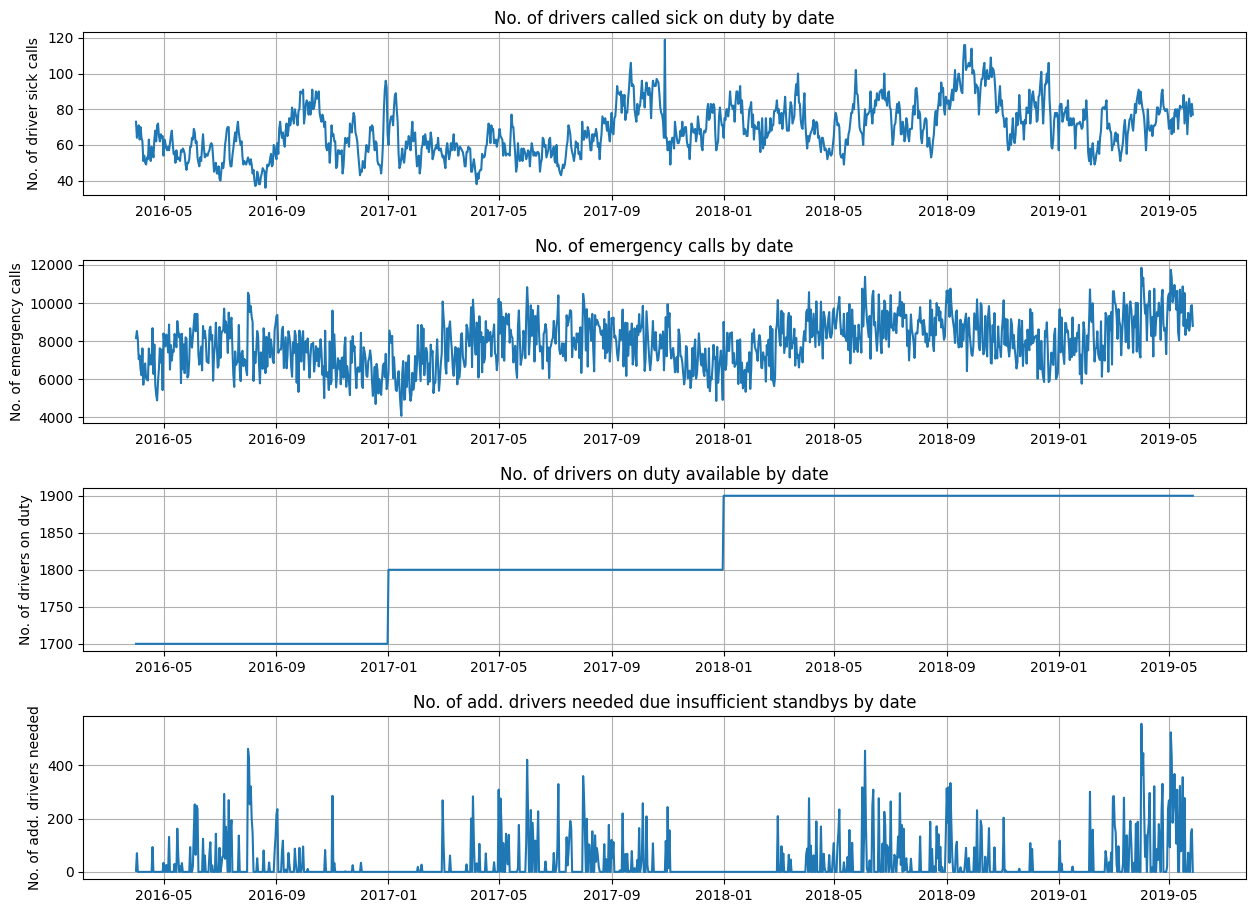

In [ ]:
titel_list=['No. of drivers called sick on duty',
            'No. of emergency calls',
            'No. of drivers on duty available',
            'No. of add. drivers needed due insufficient standbys']

y_label_list=['No. of driver sick calls',
            'No. of emergency calls',
            'No. of drivers on duty',
            'No. of add. drivers needed']

cols=['n_sick',
      'calls',
      'n_duty',
      'sby_need']

f, axs = plt.subplots(4,1, figsize=(15,11))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

for n, col in enumerate(cols):
    ax=plt.subplot(4,1, n + 1)
    ax.plot(train_data['date'], train_data[col])
    plt.ylabel(f'{y_label_list[n]}')
    plt.title(f'{titel_list[n]} by date')
    plt.grid()

plt.show()

# 1.2.2. Visualisation by Years

- graphical representation of the all variables by year
- plots the average of each variable for each year
- overall needed standby drivers for each year

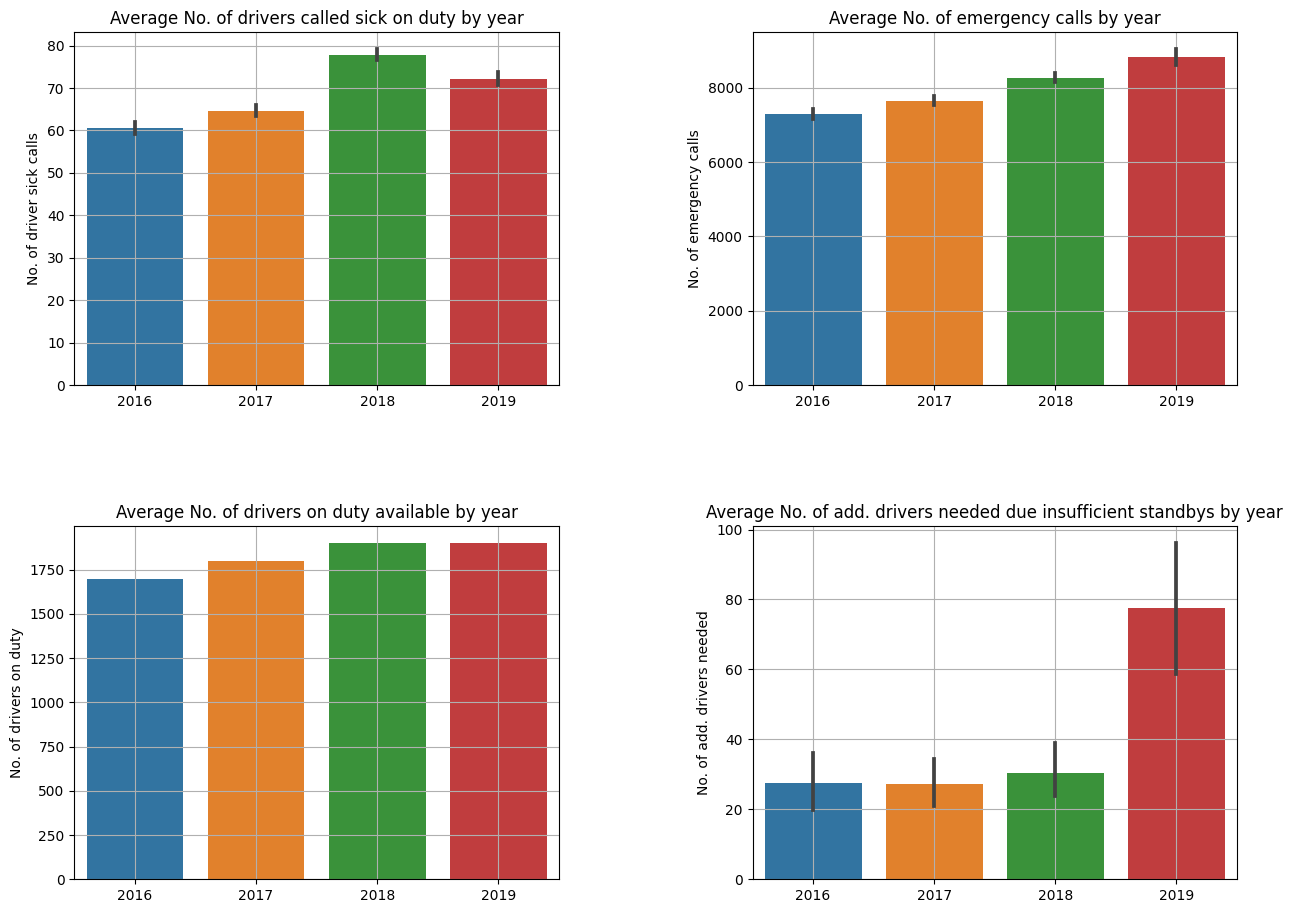

In [ ]:
f, axs = plt.subplots(2,2, figsize=(15,11))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

for n, col in enumerate(cols):
    ax=plt.subplot(2,2, n + 1)
    sns.barplot(data=train_data, x="year", y=cols[n])
    plt.ylabel(f'{y_label_list[n]}')
    ax.set(xlabel=None)
    plt.title(f'Average {titel_list[n]} by year')
    plt.grid()

plt.show()

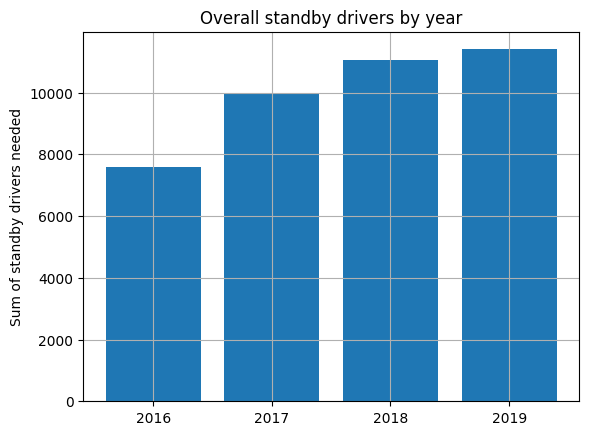

In [ ]:
list_overall_standby=[]
list_years=['2016','2017', '2018', '2019']
for yr in list_years:
  sum=train_data[train_data.year==yr]['sby_need'].sum()
  list_overall_standby.append(sum)
df_sby_year = pd.DataFrame({'year': list_years, 'overall_sby': list_overall_standby})

plt.bar(list_years, list_overall_standby)
plt.ylabel(f'Sum of standby drivers needed')
plt.title(f'Overall standby drivers by year')
plt.grid()
plt.show()

# 1.2.3. Visualisation by Months

- graphical representation of the all variables by year
- plots the average of each variable for each month

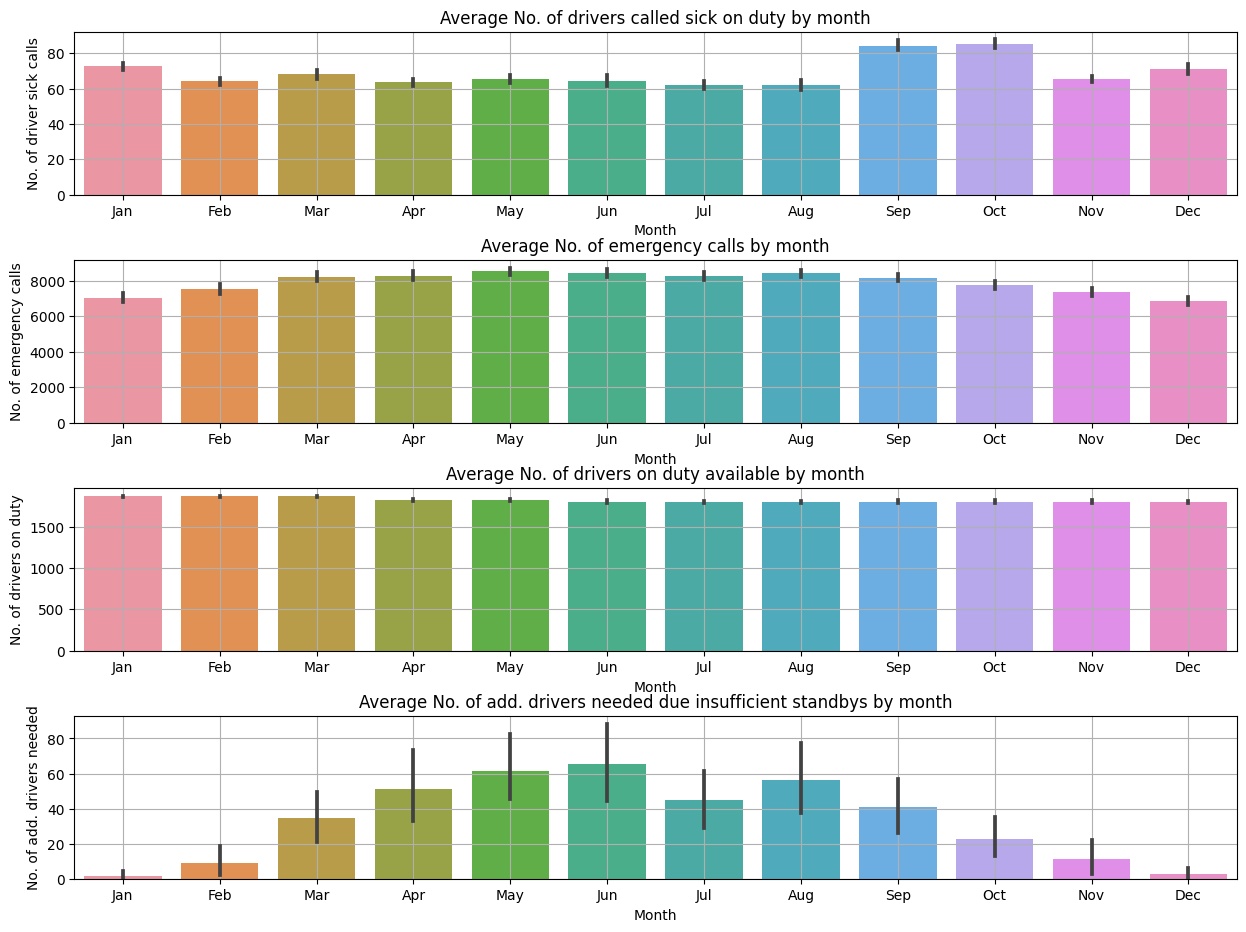

In [ ]:
f, axs = plt.subplots(4,1, figsize=(15,11))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
month_order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]

for n, col in enumerate(cols):
    ax=plt.subplot(4,1, n + 1)
    sns.barplot(data=train_data, x="month", y=cols[n], order=month_order)
    plt.ylabel(f'{y_label_list[n]}')
    plt.xlabel("Month")
    plt.title(f'Average {titel_list[n]} by month')
    plt.grid()

plt.show()

The plotted graphs show the different variables by months. In the first graph, it is noticable on average more drivers call in sick in September and October. All the other months are lower on average with July and August being the lowest.

The number of emergency calls by month is highest on average in the summer months, namely May to August. The winter months on the other hand are relatively low compared to the summer months.

On average the planned number of drivers in each month remains the same. With each new year on January, 100 additional drivers are added to the number of drivers, since each year the number of emergency calls increase steadily each year. 2019 is an exception where no new drivers were added.

Despite September and October being the months with the most driver sick calls, those months are not the months with the most with most additional standby drivers needed. Compared to May, June and August, the number of drivers needed in September and October are significantly lower. Corresponding to the high additional standby drivers needed in the summer months, the amount of emergencies are also higher on average in those same months.

Without any further analysis, the two variables **No. of emergency calls** and **No. of additional drivers needed** seem to correlate
with eachother.

This hypothesis can be further supported by look at the same visualisations by year. Even though the number of sick calls in 2019 was less than the calls in 2018, the amount of additional standby drivers needed is two or three fold of the number of 2018. This is due to the steadily increasing number of emergency calls.

# 1.2.4. Visualisation by Weekday

- graphical representation of the all variables by weekday
- plots the average of each variable for each weekday

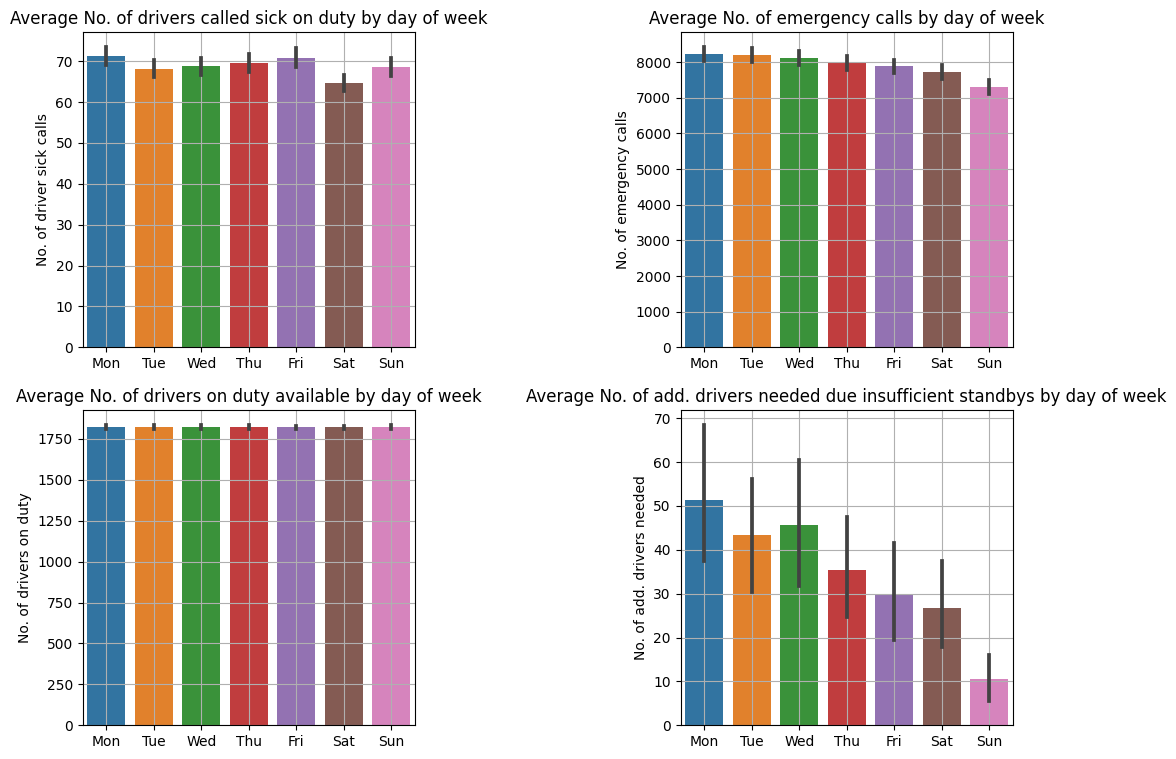

In [ ]:
f, axs = plt.subplots(2,2, figsize=(12,9))
plt.subplots_adjust(wspace = 0.8, hspace = 0.2)

day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for n, col in enumerate(cols):
    ax=plt.subplot(2,2, n + 1)
    sns.barplot(data=train_data, x="date_weekday", y=cols[n], order=day_order)
    plt.ylabel(f'{y_label_list[n]}')
    plt.title(f'Average {titel_list[n]} by day of week')
    ax.set(xlabel=None)

    plt.grid()

plt.show()

# 1.2.5. Visualisation by Weekday and Month in January, June and September

- graphical representation of the all variables by weekday for a few selective months
- plots the average of each variable for each weekday

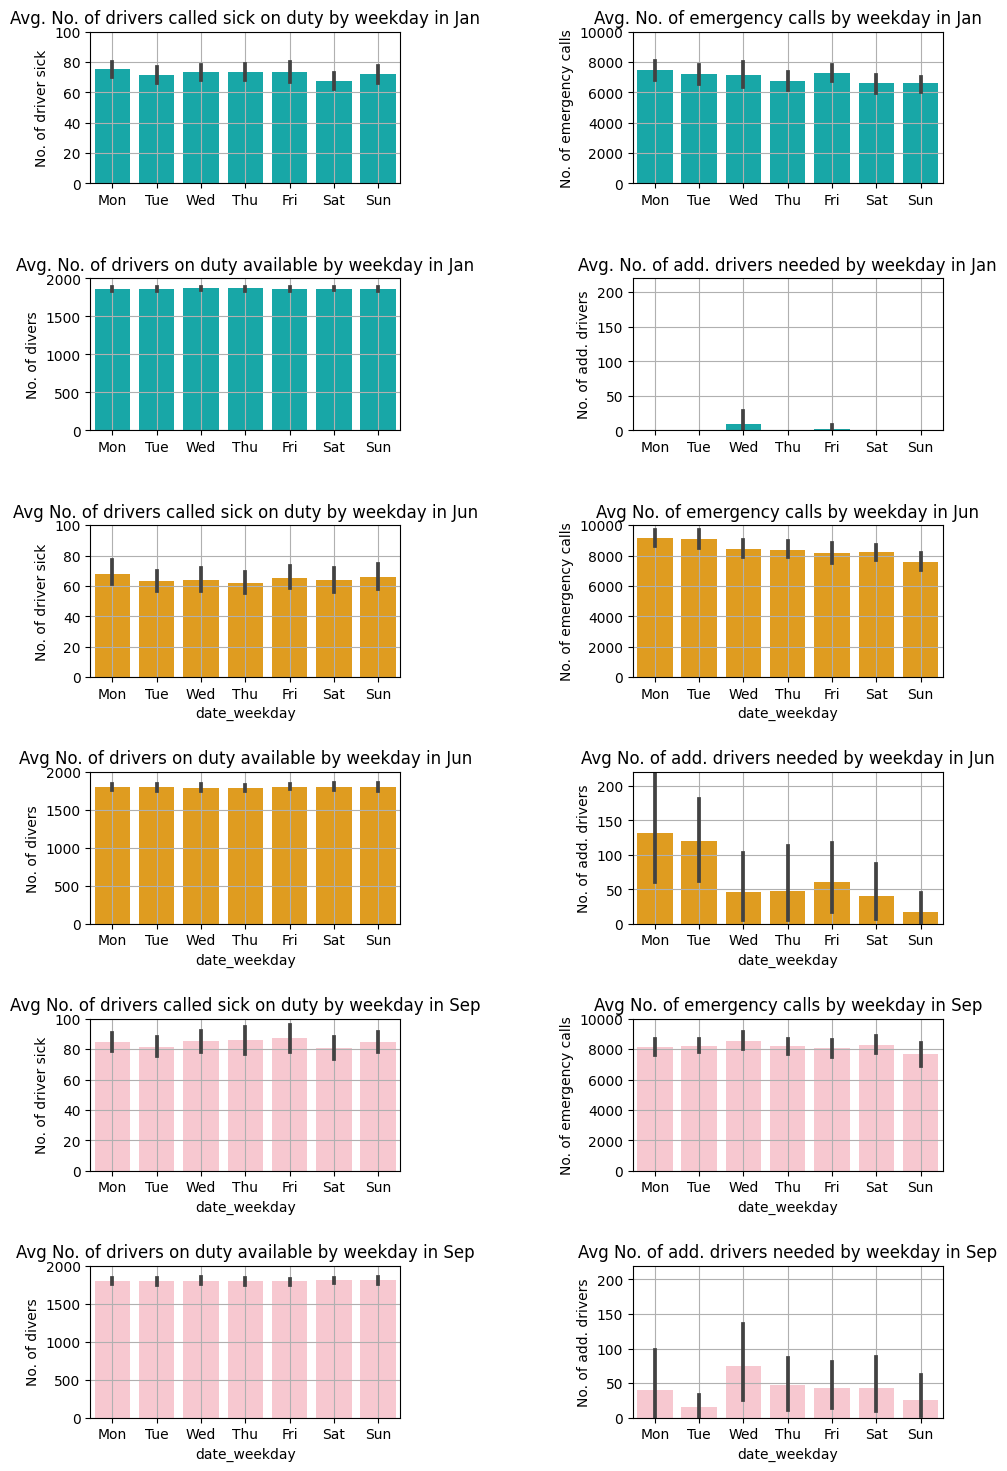

In [ ]:
f, axs = plt.subplots(6,2, figsize=(11,18))
plt.subplots_adjust(wspace = 0.75, hspace = 0.625)

day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
titel_list_multi=['No. of drivers called sick on duty',
            'No. of emergency calls',
            'No. of drivers on duty available',
            'No. of add. drivers needed']
y_label_list_multi=['No. of driver sick',
            'No. of emergency calls',
            'No. of divers',
            'No. of add. drivers']

for n, col in enumerate(cols):
    ax=plt.subplot(6,2, n + 1)
    sns.barplot(data=train_data[train_data.month=='Jan'], x="date_weekday", y=cols[n], order=day_order, color='c')
    plt.ylabel(f'{y_label_list_multi[n]}')
    plt.title(f'Avg. {titel_list_multi[n]} by weekday in Jan')
    ax.set(xlabel=None)
    set_y_scale(n, ax)
    plt.grid()

for n, col in enumerate(cols):
    ax=plt.subplot(6,2, n + 5)
    sns.color_palette("flare")
    sns.barplot(data=train_data[train_data.month=='Jun'], x="date_weekday", y=cols[n], order=day_order, color='orange')
    plt.ylabel(f'{y_label_list_multi[n]}')
    plt.title(f'Avg {titel_list_multi[n]} by weekday in Jun')
    set_y_scale(n, ax)
    plt.grid()

for n, col in enumerate(cols):
    ax=plt.subplot(6,2, n + 9)
    sns.color_palette("flare")
    sns.barplot(data=train_data[train_data.month=='Sep'], x="date_weekday", y=cols[n], order=day_order, color='pink')
    plt.ylabel(f'{y_label_list_multi[n]}')
    plt.title(f'Avg {titel_list_multi[n]} by weekday in Sep')
    set_y_scale(n, ax)
    plt.grid()

plt.show()

# 1.2.6. Other Visualisations

- scatterplot with each point for each year being an other respective shape
- correlation heat map for each variable

In [ ]:
train_data[train_data.year=='2016']
train_data[train_data.year=='2017']
train_data[train_data.year=='2018']
train_data[train_data.year=='2019'];

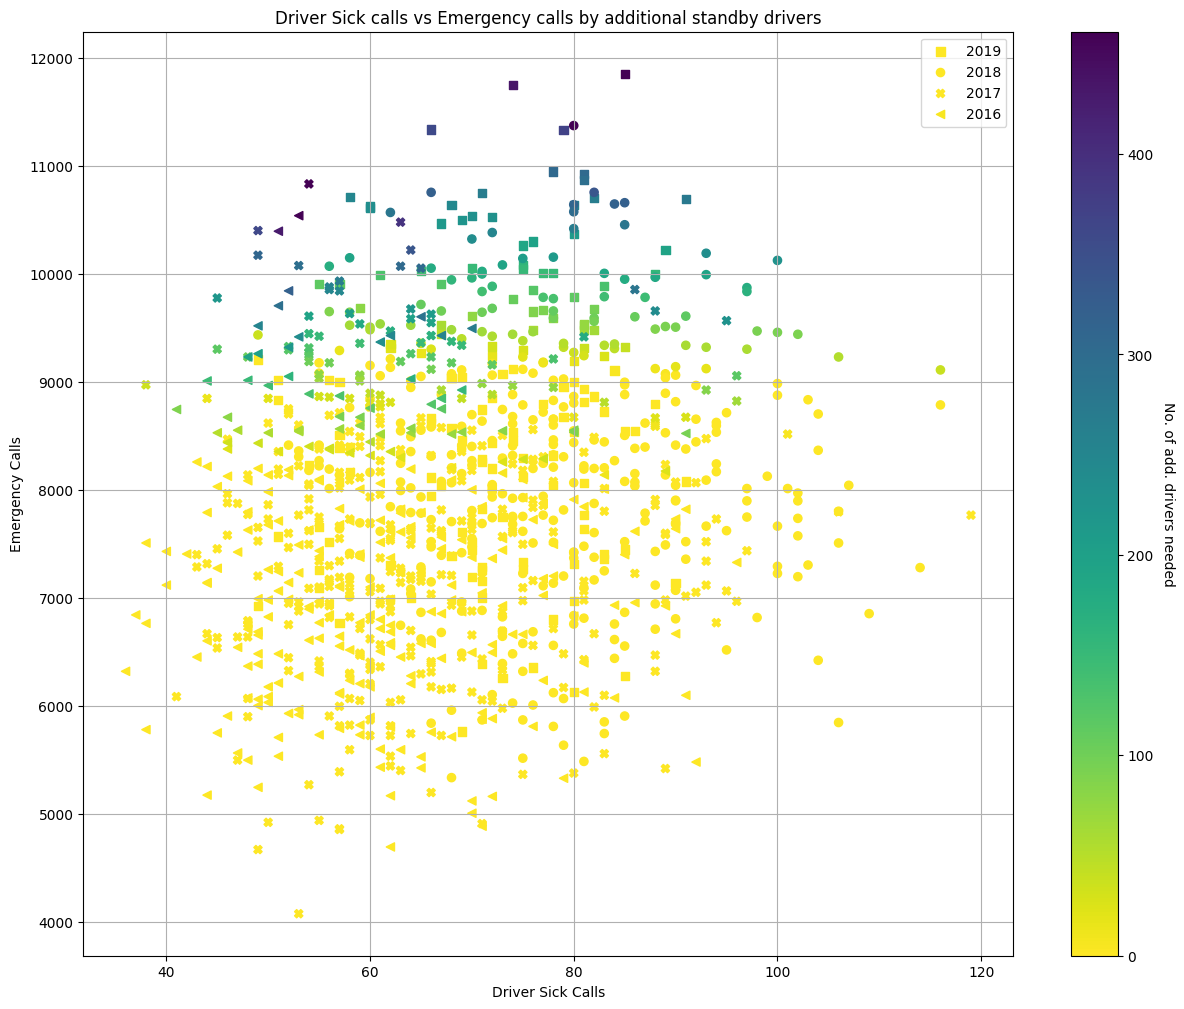

In [ ]:
fig, ax = plt.subplots( figsize = (15,12))


plt.scatter(train_data[train_data.year=='2019'].n_sick, train_data[train_data.year=='2019'].calls,
            c=train_data[train_data.year=='2019'].sby_need, cmap='viridis_r', s=35, marker='s', label='2019')
plt.scatter(train_data[train_data.year=='2018'].n_sick, train_data[train_data.year=='2018'].calls,
            c=train_data[train_data.year=='2018'].sby_need, cmap='viridis_r', s=35, marker='o', label='2018')
plt.scatter(train_data[train_data.year=='2017'].n_sick, train_data[train_data.year=='2017'].calls,
            c=train_data[train_data.year=='2017'].sby_need, cmap='viridis_r', s=35, marker='X', label='2017')
plt.scatter(train_data[train_data.year=='2016'].n_sick, train_data[train_data.year=='2016'].calls,
            c=train_data[train_data.year=='2016'].sby_need, cmap='viridis_r', s=35, marker='<', label='2016')
plt.ylabel(f'Emergency Calls')
plt.xlabel(f'Driver Sick Calls')
plt.title(f'Driver Sick calls vs Emergency calls by additional standby drivers')
ax.legend()
cbar=plt.colorbar()
cbar.set_label('No. of add. drivers needed', rotation=270, labelpad=15)
plt.grid()



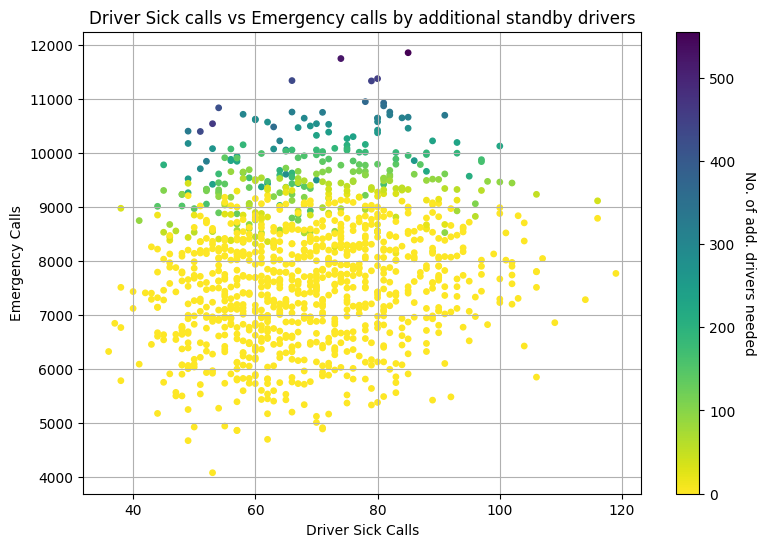

In [ ]:
fig, ax = plt.subplots( figsize = (9,6))

plt.scatter(train_data.n_sick, train_data.calls, c=train_data.sby_need, cmap='viridis_r', s=15)
plt.ylabel(f'Emergency Calls')
plt.xlabel(f'Driver Sick Calls')
plt.title(f'Driver Sick calls vs Emergency calls by additional standby drivers')
cbar=plt.colorbar()
cbar.set_label('No. of add. drivers needed', rotation=270, labelpad=15)
plt.grid()

<ipython-input-20-dd2a117e49f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=train_data_temp.corr()


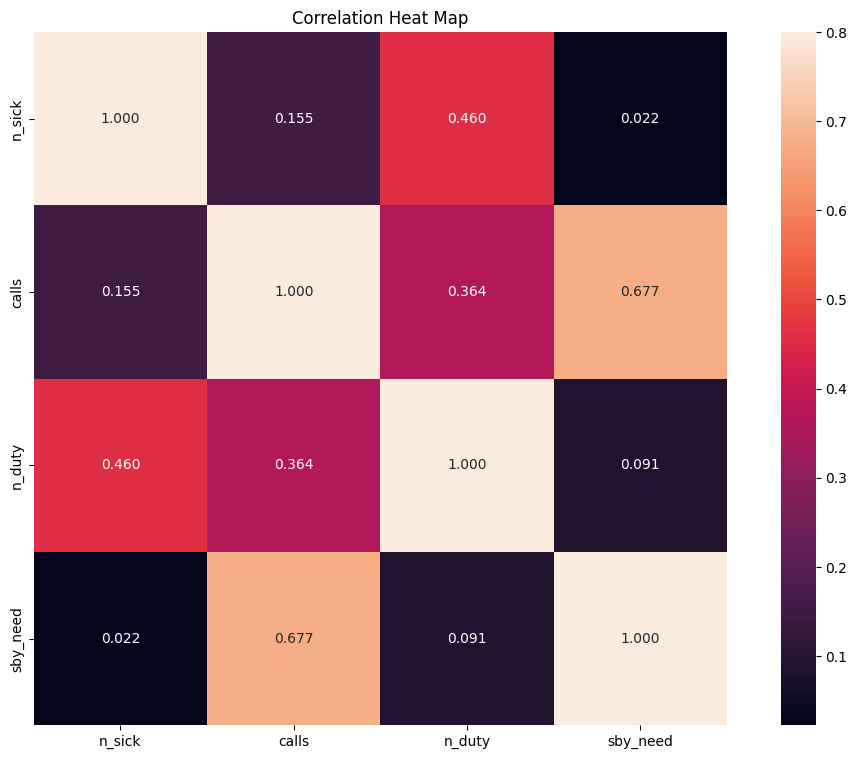

In [ ]:
#heat matrix with variable correlation
train_data_temp=train_data.drop(columns=['n_sby', 'dafted', 'month_int', 'weekofyear'])
corrmat=train_data_temp.corr()
f, ax = plt.subplots(figsize=(14, 9))
plt.title(f'Correlation Heat Map')
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".3f");

# 1.2.7. Visualisation for HR Planning Purposes

- HR people will be given the option to view historical data
- This should support them in their standby driver planning

In [ ]:
#create new column real_data -> describes that
train_data["real_data"]=1
train_data['month_day'] = train_data['month'].str.cat(train_data['day'], sep=' ')


In [ ]:
#adjust index, 91st day of 01.04.2016
new_index_range=range(91, 91+len(train_data))
train_data['new_index']=new_index_range
train_data.set_index('new_index', inplace=True)

#create the range of dates from 01.2016 to 12.2019
t = np.arange('2016','2020',dtype='datetime64[D]')
date_data={'date1':t}

#create empty dataframe with the range of dates as first entry
train_data_empty=pd.DataFrame(date_data)

#give dataframe the existing columns of train_data with 0 as all entries
for col in train_data.columns:
  train_data_empty[col]=0

#give the dataframe the range of dates with correct indexing
train_data_empty['date']=train_data_empty['date1']
train_data_empty.drop(columns=['date1'], inplace=True)

#give the empty data frame the data from train data
train_data_empty2=train_data.reindex_like(train_data_empty)

train_data_empty2['date']=train_data_empty['date']
train_data_empty2['date_str']=train_data_empty2.date.astype(str)

train_data_comp=train_data_empty2.copy()

#fill NaN value cells with 0
train_data_comp.fillna(value=0, inplace=True)

df_split_date_column(train_data_comp)
df_week_columns(train_data_comp)
df_convert_month_column(train_data_comp)

#create four seperate data frames, so that they can be visualised side by side
train_data_2016=train_data_comp[train_data_comp['year']=='2016']
train_data_2017=train_data_comp[train_data_comp.year=='2017']
train_data_2018=train_data_comp[train_data_comp.year=='2018']
train_data_2019=train_data_comp[train_data_comp.year=='2019']

#reset the indexes
train_data_2016.reset_index(inplace=True)
train_data_2017.reset_index(inplace=True)
train_data_2018.reset_index(inplace=True)
train_data_2019.reset_index(inplace=True)

#put the dataframes into a dictionary, to be used in a for loop
year_df_dict={'2016': train_data_2016, '2017': train_data_2017, '2018': train_data_2018, '2019': train_data_2019}

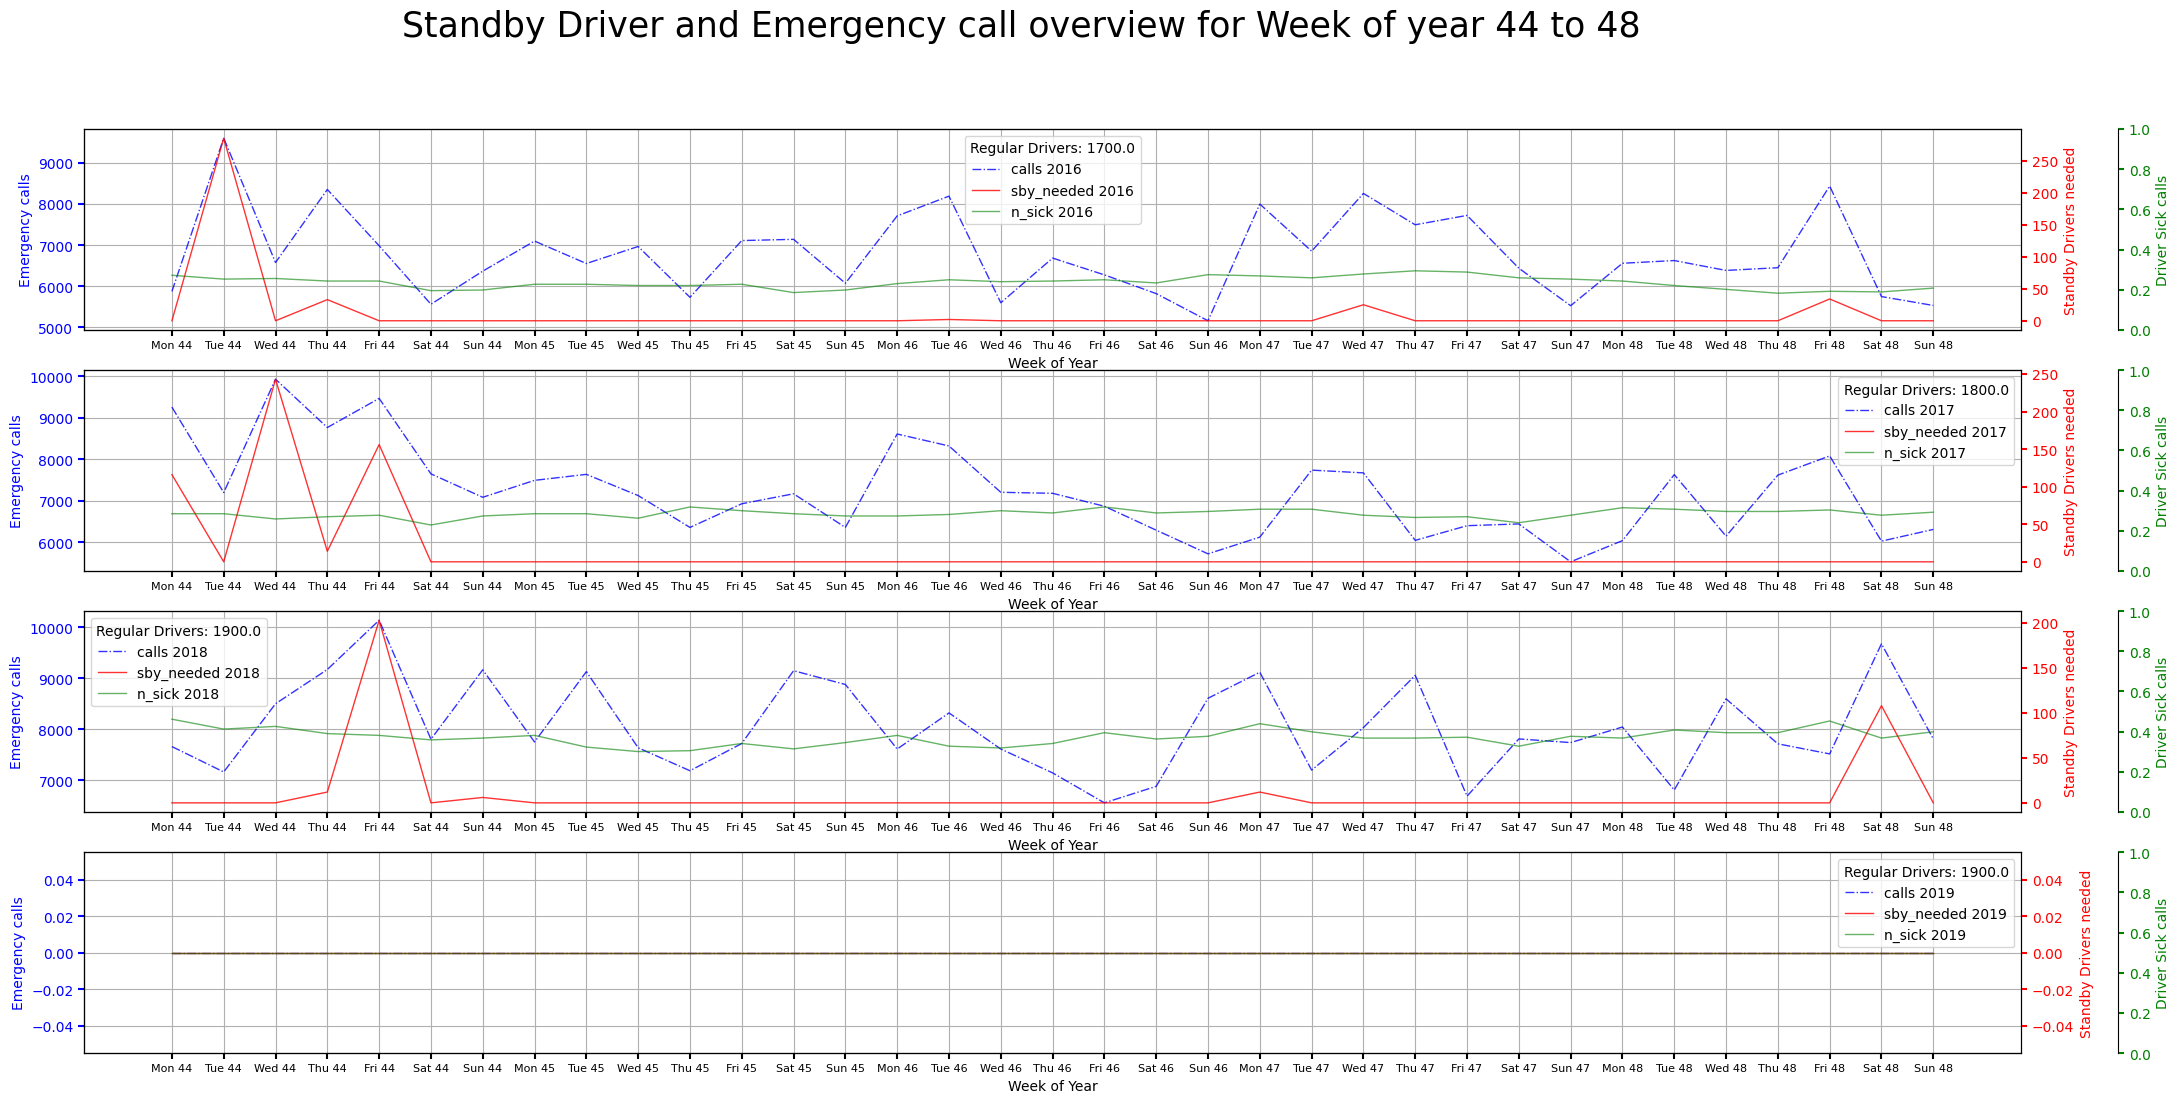

In [ ]:
years=['2016', '2017', '2018', '2019']

visualize_calls_sby_need_2(year_df_dict, years, weekofyear_start=44, weekofyear_end=48)

# 1.3. Current Standby Driver Planning


In [ ]:
standby_sum_2018=train_data_2018[train_data_2018.month=='Jun'].n_sby.sum()

print(f'Standby drivers planned in June 2018: {standby_sum_2018} standby drivers')

sby_need_sum_2018=train_data_2018[train_data_2018.month=='Jun'].sby_need.sum()

print(f'Actual Standby drivers needed in June 2018: {sby_need_sum_2018} standby drivers')

Standby drivers planned in June 2018: 2700.0 standby drivers
Actual Standby drivers needed in June 2018: 2671.0 standby drivers



In the current standby driver planning, 90 drivers are planned per default for every single day. For example for June 2018, there were 30*90=2700 standby drivers planned. The overall number of standby drivers needed was at 2671 which fits suprisingly well to the planned number. However, there were many peaks in that month and going by a different metric e.g. MSE shows the actual situation.

In [ ]:
current_situation_2018_mse=mean_squared_error(train_data_2018[train_data_2018.month=='Jun'].n_sby, train_data_2018[train_data_2018.month=='Jun'].sby_need)

print(f'Mean Square Error for June 2018: {current_situation_2018_mse}')



Mean Square Error for June 2018: 15460.9


The Mean Squared Error is abnormally high. Considering that this is the value already has a mean calculated to it, makes it even more extreme. The aim is to reduce this number significantly with the prediction model. In the following another example for February 2019.

In [ ]:
standby_sum_2019=train_data_2019[train_data_2019.month=='Feb'].n_sby.sum()

print(f'Standby drivers planned in February 2019: {standby_sum_2019} standby drivers')

sby_need_sum_2019=train_data_2019[train_data_2019.month=='Feb'].sby_need.sum()

print(f'Actual Standby drivers needed in February 2019: {sby_need_sum_2019} standby drivers')

Standby drivers planned in February 2019: 2520.0 standby drivers
Actual Standby drivers needed in February 2019: 694.0 standby drivers


In [ ]:
current_situation_2019_mse=mean_squared_error(train_data_2019[train_data_2019.month=='Feb'].n_sby, train_data_2019[train_data_2019.month=='Feb'].sby_need)

print(f'Mean Square Error for February 2019: {current_situation_2019_mse}')



Mean Square Error for February 2019: 8281.5


In [ ]:
diff=standby_sum_2019-sby_need_sum_2019
diff

1826.0

# 2.0. Data Proprocessing

In many cases, the raw data given by the customer cannot be used directly and has to be preprocessed, in order to for the models to be able to work with said data. The model  benefits from the data being proprocessed in terms of model accuracy and performance. Some models only accept a certain type of input.

# 2.1. One-hot Encoding

One-hot encoding is generally applied to categorical data where its value cannot be ranked. Certain features, in our case e.g. months or day or weeks, can have multiple entries. In terms of day of week, there is no per se better or worse week day. In these cases, the features have to be split into multiple features. The column **date_weekday** is split into 7 binary columns which indicate the corresponding day of week.

In [ ]:
#proc_train_data_df_format=train_data.copy()

In [ ]:
#categorical columns where one-hot encoding makes sense
cat_col=['month', 'date_weekday']

#applying one hot encoding to those columns
proc_train_data=one_hot_encoding(train_data, cat_col)

# 2.2. Removal of irrelevant features

For model training, certain features are irrelevant. The relevant information was either already extracted or they didnt contain any relevant information to begin with. E.g. the column **dafted** was just the subtraction of **sby** and **sby_need**. Irrelevant features are best to be removed, since we want to avoid redundant information. They can worsen the model results or cause confusion during interpretation of the model.

In [ ]:
#removal of irrelevants columns where the information is redundant or just not useful in general
irrel_cols=['date', 'dafted', 'day', 'date_str', 'n_sby', 'year', 'month_day', 'weekofyear', 'month_int', 'weekday_weekofyear', 'real_data']
proc_train_data.drop(columns=irrel_cols, inplace=True)

print(f"Data frame shape: {proc_train_data.shape}")
print('')

#we need this later for the random forests model
proc_train_data_tfdf=proc_train_data.copy()

#information overview of data frame
proc_train_data.info()

Data frame shape: (1152, 23)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 91 to 1242
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_sick            1152 non-null   int64  
 1   calls             1152 non-null   float64
 2   n_duty            1152 non-null   int64  
 3   sby_need          1152 non-null   float64
 4   month_Apr         1152 non-null   uint8  
 5   month_Aug         1152 non-null   uint8  
 6   month_Dec         1152 non-null   uint8  
 7   month_Feb         1152 non-null   uint8  
 8   month_Jan         1152 non-null   uint8  
 9   month_Jul         1152 non-null   uint8  
 10  month_Jun         1152 non-null   uint8  
 11  month_Mar         1152 non-null   uint8  
 12  month_May         1152 non-null   uint8  
 13  month_Nov         1152 non-null   uint8  
 14  month_Oct         1152 non-null   uint8  
 15  month_Sep         1152 non-null   uint8  
 16  date_weekda

In [ ]:
proc_train_data.columns

Index(['n_sick', 'calls', 'n_duty', 'sby_need', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'date_weekday_Fri', 'date_weekday_Mon', 'date_weekday_Sat',
       'date_weekday_Sun', 'date_weekday_Thu', 'date_weekday_Tue',
       'date_weekday_Wed'],
      dtype='object')

# 2.3. Splitting Data into Testing and Training Data

When training the model, it is unwise to use the entire dataset for training. It is important to "save" some data for testing and evaluating the model. If the model is evaluated using (a fraction of) the training data, the model has already learned to underlying features in that particular set of data, falsifying the evaluation result. The entire dataset is split into 80% training data and 20% testing data. The picking process is done at random

In [ ]:
#split data into X and y
y=proc_train_data.sby_need
proc_train_data.drop(columns=['sby_need'], inplace=True)

#split data into train and testing data sets, with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(proc_train_data, y, test_size=0.2, random_state=42)

#copying data for later comparisons
result_df=y_test.copy()

#making a pandas dataframe out of a pandas series
result_df=pd.DataFrame(result_df)

result_df=result_df.reset_index()

In [ ]:
proc_train_data

,n_sick,calls,n_duty,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,month_Nov,month_Oct,month_Sep,date_weekday_Fri,date_weekday_Mon,date_weekday_Sat,date_weekday_Sun,date_weekday_Thu,date_weekday_Tue,date_weekday_Wed
new_index,,,,,,,,,,,,,,,,,,,,,
91,73,8154.0,1700,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
92,64,8526.0,1700,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
93,68,8088.0,1700,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
94,71,7044.0,1700,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
95,63,7236.0,1700,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,86,8544.0,1900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1239,81,8814.0,1900,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1240,76,9846.0,1900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 2.4. Standardizing Data

For some statistical models, it is beneficial for the data to have a normal distribution. Here the distribution of training and testing data partitions are transformed into a normal distribution.

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 3.0. Modelling Approaches with all variables

In this chapter, we will test out some models with their default values and take a look at what model could fit to our use-case.

# 3.1. Ridge and Lasso Regression

Linear regression with ridge and lasso regularization.

In [ ]:
#model initialization
ridge=Ridge(alpha=0.10, random_state=True, positive=False)
lasso=Lasso(alpha=1.0)

#model training
ridge.fit(X_train_std, y_train)
lasso.fit(X_train_std, y_train)

#model evaluation
ridge_pred=ridge.predict(X_test_std)
lasso_pred=lasso.predict(X_test_std)

#Mean square error and R2 score as evaluation metrics
ridge_mse=mean_squared_error(y_test, ridge_pred)
lasso_mse=mean_squared_error(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R2:", ridge_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2:", lasso_r2)

#combined dataframe for all predictions for future visualisation
result_df['ridge']=ridge_pred.tolist()
result_df['lasso']=lasso_pred.tolist()

#appending r-score in a list, for future visualisation
list_r2=[]
list_r2.append(ridge_r2)
list_r2.append(lasso_r2)

Ridge Regression MSE: 2544.344143257932
Ridge Regression R2: 0.3280573603856832
Lasso Regression MSE: 2530.6643808717563
Lasso Regression R2: 0.33167008536686193


# 3.2. Support Vector Regression

In [ ]:
#model initialization
svr=SVR(C=1.0, epsilon=0.2, kernel='linear')

#model training
svr.fit(X_train_std, y_train)

#model evaluation and prediction
svr_pred=svr.predict(X_test_std)

#Mean square error and R2 score as evaluation metrics
svr_mse=mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression MSE:", svr_mse)
print("Support Vector Regression R2:", svr_r2)

#combined dataframe for all predictions for future visualisation
result_df['svr']=svr_pred.tolist()

#appending r-score in a list, for future visualisation
list_r2.append(svr_r2)

Support Vector Regression MSE: 3363.32633000555
Support Vector Regression R2: 0.11177016754719771


# 3.3. K-Nearest Neighbour

In [ ]:
#model initialization
knn=KNeighborsRegressor(n_neighbors=2)

#model training
knn.fit(X_train_std, y_train)

#model evaluation and prediction
knn_pred=knn.predict(X_test_std)

#Mean square error and R2 score as evaluation metrics
knn_mse=mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("Support Vector Regression MSE:", knn_mse)
print("Support Vector Regression R2:", knn_r2)

#combined dataframe for all predictions for future visualisation
result_df['knn']=knn_pred.tolist()

#appending r-score in a list, for future visualisation
list_r2.append(knn_r2)

Support Vector Regression MSE: 2852.910173160173
Support Vector Regression R2: 0.2465673335049905


# 3.4. Random Forest with TensorFlow Decision Forest (TFDF)

In [ ]:
#combined train df, train_test_split same as the other models
train_df=X_train.copy()
test_df=X_test.copy()
train_df['sby_need']=y_train
test_df['sby_need']=y_test

#TensorFlow cannot deal with binary variables, they are converted to int64
for col in train_df.columns:
    train_df[col]=train_df[col].astype(np.int64)
    test_df[col]=test_df[col].astype(np.int64)

#convert dataframe into tensors
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)

#model initialisation
rf=tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

#model evaluation
rf.compile(metrics=["mse"])

#model training
rf.fit(x=train_ds)

#silences warning
tf.autograph.set_verbosity(0)

#model prediction/evaluation
rf_pred=rf.predict(test_ds)

#Mean square error and R2 score as evaluation metrics
rf_mse=mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("TensorFlow Random Forest Regression MSE:", rf_mse)
print("TensorFlow Random Forest Regression R2:", rf_r2)

#combined dataframe for all predictions for future visualisation
result_df['rf']=rf_pred.reshape(-1).tolist()

#appending r-score in a list, for future visualisation
list_r2.append(rf_r2)

Use /tmp/tmpzauor0rd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:11.322815. Found 921 examples.
Training model...
Model trained in 0:00:01.015313
Compiling model...
Model compiled.
1/1 [==============================] - 0s 63ms/step
TensorFlow Random Forest Regression MSE: 121.87182787453193
TensorFlow Random Forest Regression R2: 0.9678145435106995


In [ ]:
#Visualisation of TensorFlow decision forest
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

# 3.5. Support Vector Regression with optimized Parameters (GridSearchCV)

In [ ]:
#model initialization
svr_opt=SVR(C=44300.0, epsilon=14.4, kernel='rbf')

#model training
svr_opt.fit(X_train_std, y_train)

#model evaluation and prediction
svr_pred_opt=svr_opt.predict(X_test_std)

#Mean square error and R2 score as evaluation metrics
svr_mse_opt=mean_squared_error(y_test, svr_pred_opt)
svr_r2_opt = r2_score(y_test, svr_pred_opt)

print("Support Vector Regression MSE:", svr_mse_opt)
print("Support Vector Regression R2:", svr_r2_opt)

#combined dataframe for all predictions for future visualisation
result_df['svm_opt']=svr_pred_opt.tolist()

#appending r-score in a list, for future visualisation
list_r2.append(svr_r2_opt)

Support Vector Regression MSE: 527.4712940278209
Support Vector Regression R2: 0.8606986973169443


In [ ]:
#replacing negative values with 0 and rounding up
result_df[result_df<0]=0
result_df=result_df.round(0)

result_df

,new_index,sby_need,ridge,lasso,svr,knn,rf,svm_opt
0,265,35.0,72.0,73.0,19.0,74.0,22.0,44.0
1,845,0.0,85.0,83.0,16.0,138.0,17.0,45.0
2,675,0.0,17.0,18.0,2.0,0.0,0.0,0.0
3,331,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,806,0.0,16.0,19.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
226,450,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,154,154.0,117.0,110.0,25.0,148.0,104.0,112.0
228,479,0.0,55.0,52.0,9.0,0.0,0.0,0.0
229,1159,25.0,80.0,86.0,16.0,48.0,36.0,42.0


# 3.6. Visualisation of Model overview

- plot of each model with its respective R2-Score and MSE
- in dashed orange: the original test data for sby_need
- in blue: the predicted sby_need
- in dashed grey: default 90 standby drivers

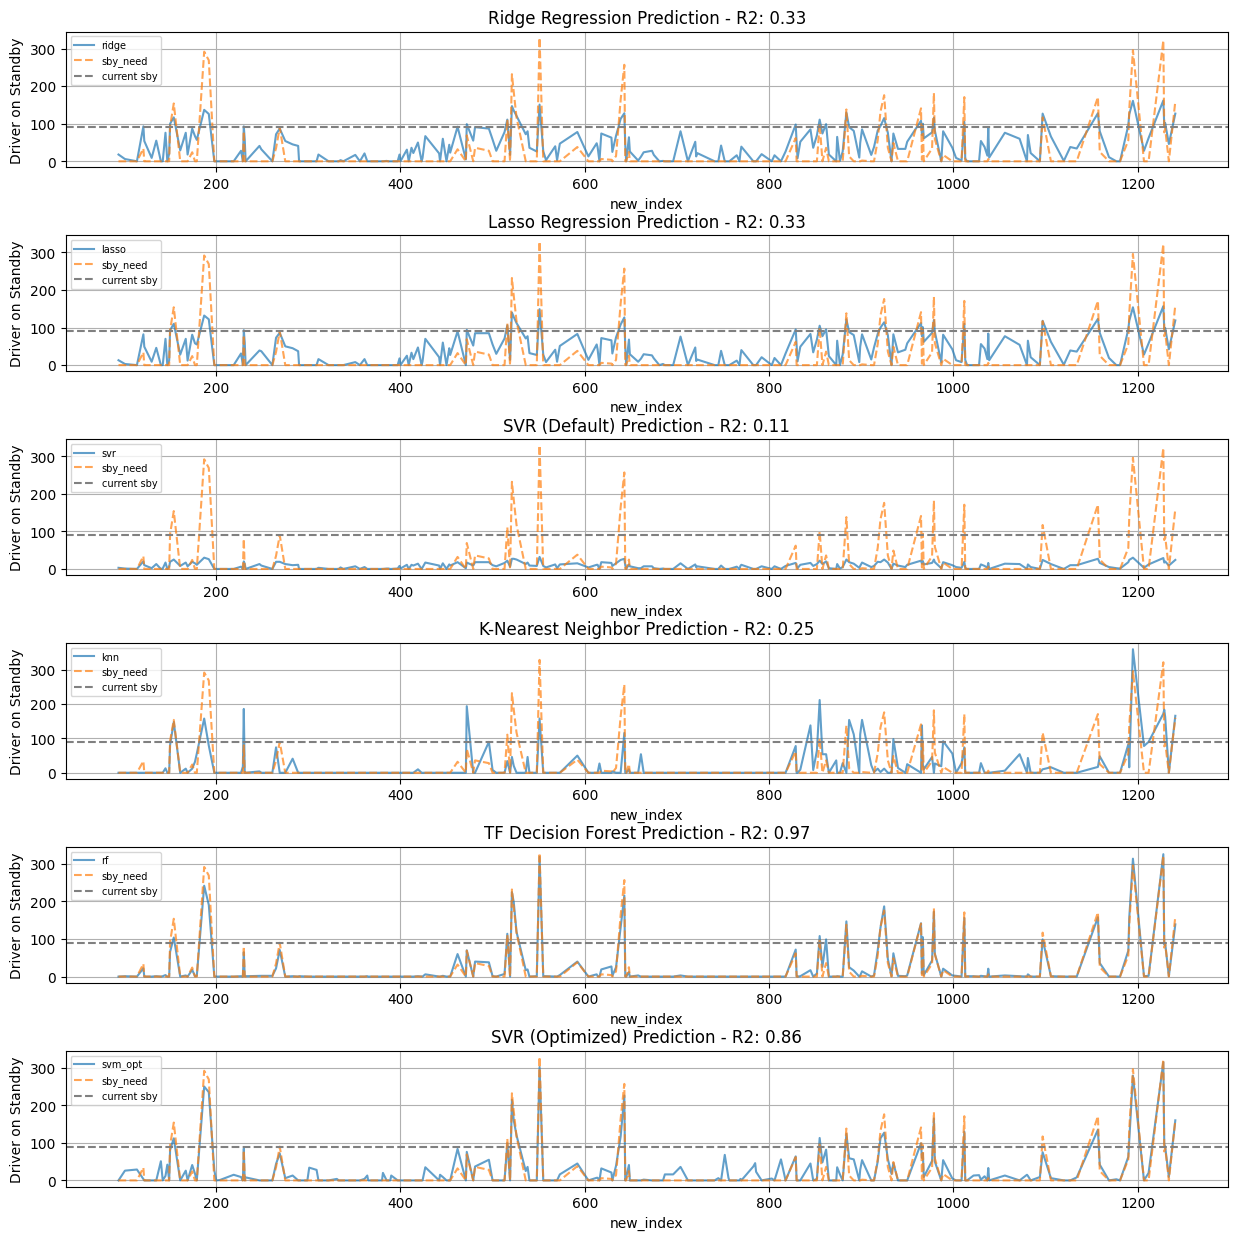

In [ ]:
f, axs = plt.subplots(6,1, figsize=(15,15))
plt.subplots_adjust(wspace = 0.8, hspace = 0.5)

cols=['ridge','lasso','svr','knn','rf','svm_opt']
plot_titels=['Ridge Regression', 'Lasso Regression', 'SVR (Default)', 'K-Nearest Neighbor', 'TF Decision Forest', 'SVR (Optimized)']

for n, col in enumerate(cols):

    ax=plt.subplot(6,1, n + 1)
    sns.lineplot(data=result_df, x='new_index', y=col, alpha=0.7, label=col)
    sns.lineplot(data=result_df, x='new_index', y='sby_need', alpha=0.7, label='sby_need')
    plt.axhline(y=90, color='grey', linestyle='--', label='current sby')
    ax.lines[1].set_linestyle("--")
    plt.title(f'{plot_titels[n]} Prediction - R2: {list_r2[n]:.2f}')
    plt.ylabel(f"Driver on Standby")
    ax.legend(loc='upper left', fontsize="7",)
    plt.grid()

plt.show()

# 3.7. TensorFlow Decision Forest and Optimized Support Vector Regression in Focus
- the two most accurate models in focus

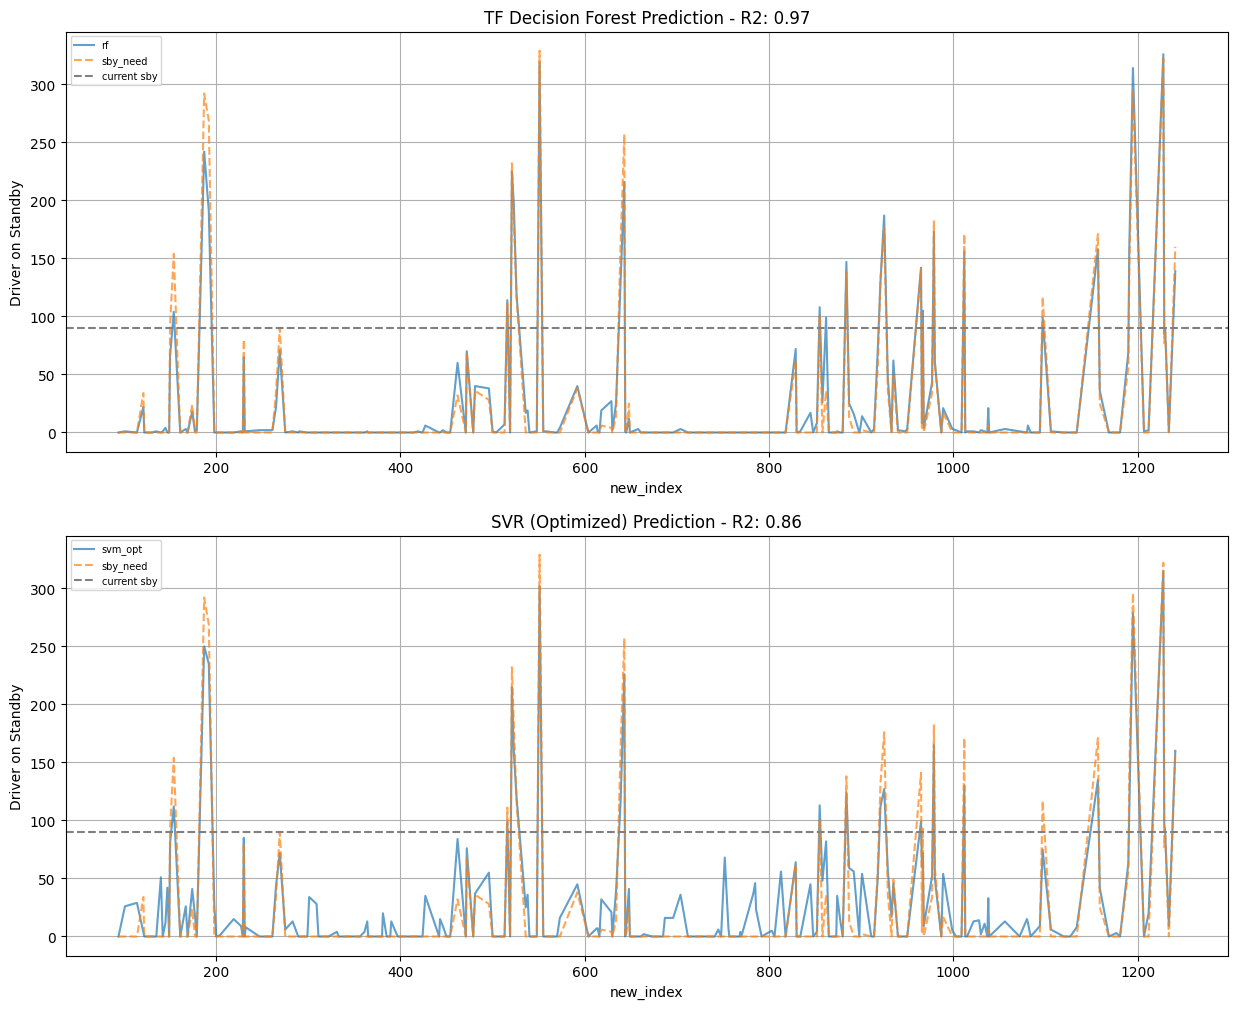

In [ ]:
f, axs = plt.subplots(2,1, figsize=(15,12))
plt.subplots_adjust(wspace = 0.8, hspace = 0.2)

cols=['rf','svm_opt']
plot_titels=['TF Decision Forest', 'SVR (Optimized)']

for n, col in enumerate(cols):

    ax=plt.subplot(2,1, n + 1)
    sns.lineplot(data=result_df, x='new_index', y=col, alpha=0.7, label=col)
    sns.lineplot(data=result_df, x='new_index', y='sby_need', alpha=0.7, label='sby_need')
    plt.axhline(y=90, color='grey', linestyle='--', label='current sby')
    ax.lines[1].set_linestyle("--")
    plt.title(f'{plot_titels[n]} Prediction - R2: {list_r2[n+4]:.2f}')
    plt.ylabel(f"Driver on Standby")
    ax.legend(loc='upper left', fontsize="7",)
    plt.grid()

plt.show()

# 3.8. Model vs Current Planning

Since TFDF performs the best out of all models, we are only going to look at the TFDF model from here on. In this section, we will compare the number of currently planned standby drivers and the number of standby drivers planned with the TFDF model.
To be on the safe side, it makes sense to plan a few standby drivers even if the model predicts that 0 standby drivers are needed. Since the data shows that the upper 75th percentile is 12.25, we will just assume a default standby driver number of 15.

In [ ]:
default_current_sby=result_df['sby_need'].count()*90
actual_sby=result_df['sby_need'].sum()
tfdf_sby=result_df['rf'].sum()

result_df["rf15"]=result_df["rf"].clip(lower=15)
tfdf15_sby=result_df['rf15'].sum()

print(f'Current standby drivers needed for the randomly sampled 231 days: {default_current_sby} standby drivers')
print(f'Actual standby drivers needed for the randomly sampled 231 days: {actual_sby} standby drivers')
print(f'Predicted standby drivers needed (TFDF) for the randomly sampled 231 days: {tfdf_sby} standby drivers')
print(f'Predicted standby drivers needed (TFDF) with default 15 drivers for the randomly sampled 231 days: {tfdf15_sby} standby drivers')


Current standby drivers needed for the randomly sampled 231 days: 20790 standby drivers
Actual standby drivers needed for the randomly sampled 231 days: 5673.0 standby drivers
Predicted standby drivers needed (TFDF) for the randomly sampled 231 days: 5828.0 standby drivers
Predicted standby drivers needed (TFDF) with default 15 drivers for the randomly sampled 231 days: 8286.0 standby drivers


For the randomly choosen sample days which consist of 231 days, the current default number of standby drivers needed would be over 20000 people. The improvement with the model prediction lies at about 6000 standby drivers. This is an improvement of more than 200%.

With the default 15 drivers, the total number of shifts planned is at a bit more than 8000.

# 3.9. Modelling Approaches with Month, Day of Week, and Planned Drivers
- since driver sick calls and emergency calls are somewhat random, we are only looking at the prediction with date
- the results are unusable, the negative R2 Score indicates that

In [ ]:
#split data into X and y, remove sick calls, and emergency calls since HR cannot predict those variables
proc_train_data.drop(columns=['n_sick', 'calls'], inplace=True)

#split data into train and testing data sets, with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(proc_train_data, y, test_size=0.2, random_state=42)

#copying data for later comparisons
result_date_pd_df=y_test.copy()

#making a pandas dataframe out of a pandas series
result_date_pd_df=pd.DataFrame(result_date_pd_df)

result_date_pd_df=result_date_pd_df.reset_index()



In [ ]:
#combined train df, train_test_split same as the other models
train_df=X_train.copy()
test_df=X_test.copy()
train_df['sby_need']=y_train
test_df['sby_need']=y_test

#TensorFlow cannot deal with binary variables, they are converted to int64
for col in train_df.columns:
    train_df[col]=train_df[col].astype(np.int64)
    test_df[col]=test_df[col].astype(np.int64)

#convert dataframe into tensors
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)

#model initialisation
rf_date_only=tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

#model evaluation
rf_date_only.compile(metrics=["mse"])

#model training
rf_date_only.fit(x=train_ds)

#silences warning
tf.autograph.set_verbosity(0)

#model prediction/evaluation
rf_pred_date_only=rf_date_only.predict(test_ds)

#Mean square error and R2 score as evaluation metrics
rf_mse_date_only=mean_squared_error(y_test, rf_pred_date_only)
rf_r2_date_only = r2_score(y_test, rf_pred_date_only)

print("TensorFlow Random Forest Regression MSE:", rf_mse_date_only)
print("TensorFlow Random Forest Regression R2:", rf_r2_date_only)

#combined dataframe for all predictions for future visualisation
result_date_pd_df['rf']=rf_pred_date_only.reshape(-1).tolist()

#appending r-score in a list, for future visualisation
list_r2.append(rf_r2_date_only)

Use /tmp/tmpvq8_vnv3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.370349. Found 921 examples.
Training model...
Model trained in 0:00:00.919492
Compiling model...
Model compiled.
1/1 [==============================] - 0s 85ms/step
TensorFlow Random Forest Regression MSE: 4677.332244991743
TensorFlow Random Forest Regression R2: -0.23524916367192072


In [ ]:
#replacing negative values with 0 and rounding up
result_date_pd_df[result_date_pd_df<0]=0
result_date_pd_df=result_date_pd_df.round(0)

result_date_pd_df

,new_index,sby_need,rf
0,265,35.0,57.0
1,845,0.0,167.0
2,675,0.0,15.0
3,331,0.0,1.0
4,806,0.0,61.0
...,...,...,...
226,450,0.0,4.0
227,154,154.0,39.0
228,479,0.0,83.0
229,1159,25.0,57.0


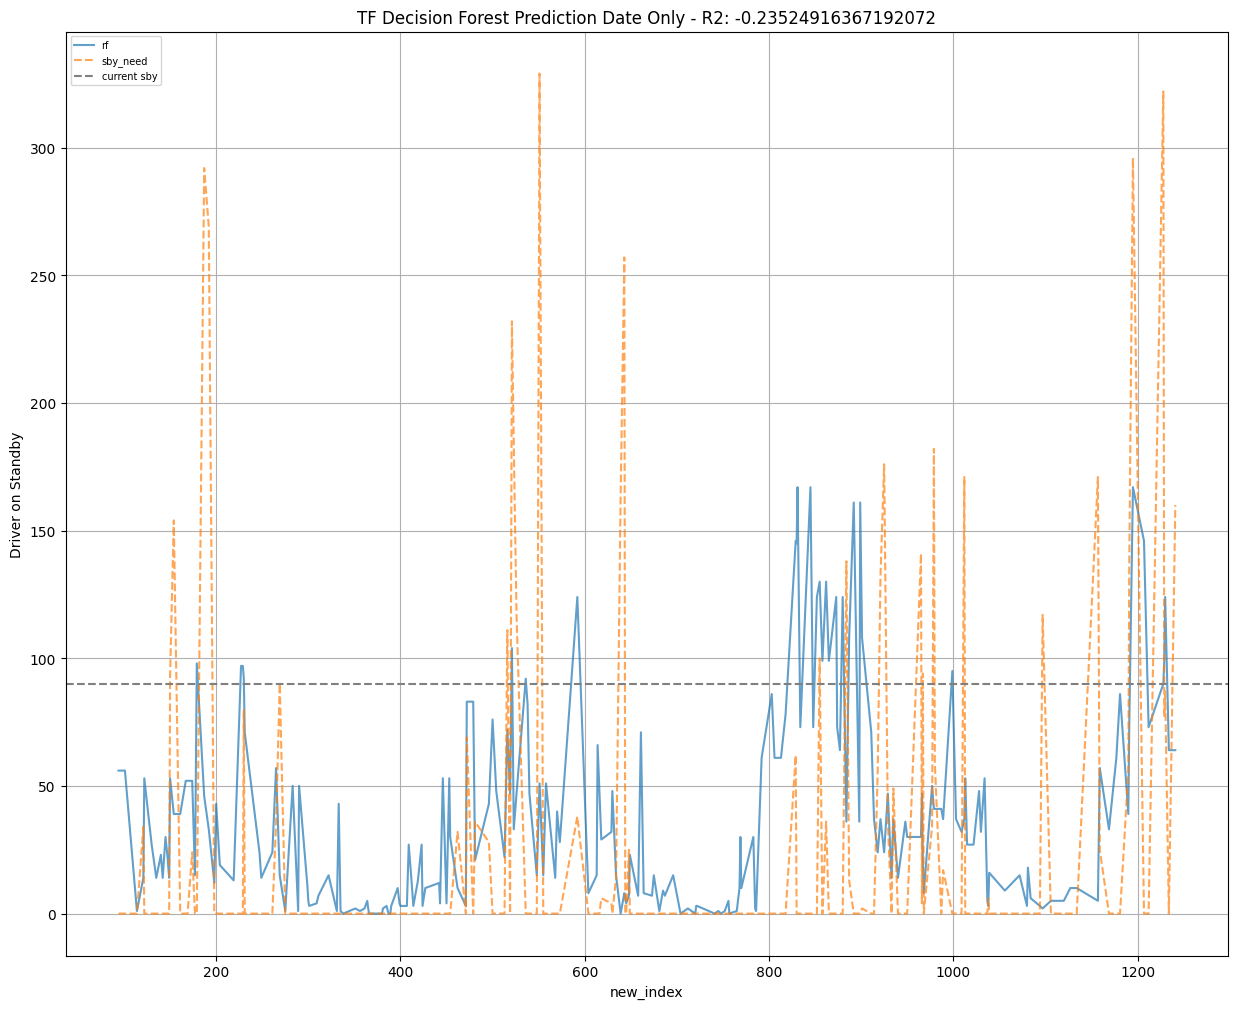

In [ ]:
f, axs = plt.subplots(1,1, figsize=(15,12))
plt.subplots_adjust(wspace = 0.8, hspace = 0.2)

cols=['rf']
plot_titels=['TF Decision Forest']

for n, col in enumerate(cols):


    ax=plt.subplot(1,1, n + 1)
    sns.lineplot(data=result_date_pd_df, x='new_index', y=col, alpha=0.7, label=col)
    sns.lineplot(data=result_date_pd_df, x='new_index', y='sby_need', alpha=0.7, label='sby_need')
    plt.axhline(y=90, color='grey', linestyle='--', label='current sby')
    plt.title(f'{plot_titels[n]} Prediction Date Only - R2: {rf_r2_date_only}')
    ax.lines[1].set_linestyle("--")
    plt.ylabel(f"Driver on Standby")
    ax.legend(loc='upper left', fontsize="7",)
    plt.grid()

plt.show()

This doesnt really work, we will need to somehow create n_sick and calls.

In [ ]:
#model initialization
svr=SVR(C=44300.0, epsilon=14.4, kernel='rbf')

#model training
svr.fit(X_train, y_train)

#model evaluation and prediction
svr_pred=svr.predict(X_test)

#Mean square error and R2 score as evaluation metrics
svr_mse=mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression MSE:", svr_mse)
print("Support Vector Regression R2:", svr_r2)

svr_pred

Support Vector Regression MSE: 3889.108151881803
Support Vector Regression R2: -0.027084957923515507


array([14.39672472, 14.43232787, 14.36681362, 14.34197677, 14.39106375,
       14.34927181, 14.36179068, 14.3673196 , 14.37706241, 14.36687594,
       14.36741003, 14.4351865 , 14.39134546, 14.36070762, 14.31330391,
       14.40946468, 14.39106375, 14.28010202, 14.36464057, 14.42076987,
       14.38788399, 14.31330391, 14.36406265, 14.38067505, 14.40653503,
       14.40319859, 14.40693369, 14.39554135, 14.39365205, 14.36986227,
       14.37481695, 14.39378714, 14.35871164, 14.39409197, 14.43232787,
       14.39493833, 14.40227216, 14.37763294, 14.39399015, 14.42845996,
       14.40932656, 14.44849144, 14.40646797, 14.40693369, 14.40839803,
       14.41147299, 14.40370908, 14.39780209, 14.3119998 , 14.32702913,
       14.42937051, 14.42656649, 14.37659503, 14.37963561, 14.37659503,
       14.37763294, 14.3748582 , 14.34613616, 14.41053651, 14.44849144,
       14.37309589, 14.3928098 , 14.38201705, 14.3960723 , 14.42656649,
       14.41680394, 14.35348351, 14.42550432, 14.36926846, 14.37

# 4.0.0. Prediction Application for HR

# 4.1. Prediction example for 28-05-2019 to 28-06-2019

In [ ]:
#input date with year, month and day as seperate inputs
pred_start_date_dt=datetime.datetime(2019, 4, 28)
pred_end_date_dt=datetime.datetime(2019, 5, 28)

#pred_date_length=t_pred = np.arange(pred_start_date_dt,pred_end_date_dt,dtype='datetime64[D]')


#get start date - week of year (woy)
pred_start_date_woy=pred_start_date_dt.isocalendar()[1]
pred_end_date_woy=pred_end_date_dt.isocalendar()[1]+1

#convert start date and end date to week of year (original dates)
pred_start_date_orig=np.datetime64(pred_start_date_dt, 'D')
pred_end_date_orig=np.datetime64(pred_end_date_dt, 'D')

#convert start date and end date to week of year
pred_start_date_extended=datetime.date.fromisocalendar(2019, pred_start_date_woy, 1)
pred_end_date_extended=datetime.date.fromisocalendar(2019, pred_end_date_woy, 1)

#define time slot to predict
pred_start_date=np.datetime64(pred_start_date_extended, 'D')
pred_end_date=np.datetime64(pred_end_date_extended, 'D')

#create the range of dates from 01.2016 to 12.2019
t_pred = np.arange(pred_start_date,pred_end_date,dtype='datetime64[D]')

#create new empty dataframe
pred_df=pd.DataFrame()

#give new dataframe all the columns from train_data
for col in train_data.columns:
  pred_df[col]=0

#assign time frame to dataframe
pred_df['date_temp']=t_pred

#give the dataframe the range of dates with correct indexing
pred_df['date']=pred_df['date_temp']
pred_df.drop(columns=['date_temp'], inplace=True)

pred_df['date']=pred_df['date']
pred_df['date_str']=pred_df.date.astype(str)

#fill NaN value cells with 0
pred_df.fillna(value=0, inplace=True)

#splits the date data into corresponding columns
df_split_date_column(pred_df)
df_week_columns(pred_df)
df_convert_month_column(pred_df)

#find weekday_weekofyear of corresponding date
weekday_weekofyear_pred=pred_df.loc[pred_df.date==pred_start_date_orig].weekday_weekofyear.values[0]

#get the week of years from the entire complete dataframe with all dates from 2016 - 2019 incl. the missing dates
pred_df_prep_data=get_df_timeslot(train_data_comp, pred_start_date_woy, pred_end_date_woy)

# 4.1.1 Preparing data for the prediction

In [ ]:
#year df timeslot dict
year_df_ts_dict={}
factor_df_dict={}

temp_df=pd.DataFrame()

year_df_correct_length_dict={}

f1=1.15
f2=1.1
f3=1.05
f4=1.0

factor_df_dict_calls={'2016': f1, '2017': f2, '2018': f3, '2019': f4}
factor_df_dict_sick={'2016': 1, '2017': 1, '2018': 1, '2019': 1}

#years=['2016', '2017', '2018', '2019']

for year in years:
  temp_df=seperate_df_weekofyear_into_df_year(pred_df_prep_data, year)
  temp_df.reset_index(inplace=True)
  year_df_ts_dict[year]=temp_df.copy()

for year in years:
  year_index=year_df_ts_dict[year].loc[year_df_ts_dict[year].weekday_weekofyear==weekday_weekofyear_pred].index.values[0]
  year_df_correct_length_dict[year]=year_df_ts_dict[year][year_index:(year_index+len(t_pred))]

avg_calls=calc_average_df_feature(year_df_correct_length_dict, years, 'calls', factor_df_dict_calls)
avg_n_sick=calc_average_df_feature(year_df_correct_length_dict, years, 'n_sick', factor_df_dict_calls)
pred_df['calls']=avg_calls
pred_df['n_sick']=avg_n_sick
pred_df['n_duty']=1900

# 4.1.2. Bringing the prediction data into the right format

In [ ]:
#applying one hot encoding to those columns
proc_pred_data=data_prep_df(pred_df, cat_col, irrel_cols)

#proc_pred_data.drop(columns=['sby_need'], inplace=True)

#TensorFlow cannot deal with binary variables, they are converted to int64
for col in proc_pred_data.columns:
    proc_pred_data[col]=proc_pred_data[col].astype(np.int64)

#add remaining one hot columns
one_hot_month_cols=['month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Oct', 'month_Sep']

for col in one_hot_month_cols:
    proc_pred_data[col]=0

#converting prediction data into keras ds data type
pred_ds = tfdf.keras.pd_dataframe_to_tf_dataset(proc_pred_data, label='sby_need', task=tfdf.keras.Task.REGRESSION)



# 4.2. Example Prediction

In [ ]:
#model prediction/evaluation
rf_pred=rf.predict(pred_ds)

#prediction result dataframe
pred_result=pd.DataFrame()

#combined dataframe for all predictions for future visualisation
pred_result['sby_need']=rf_pred.reshape(-1).tolist()

pred_result=pred_result.round(0)

1/1 [==============================] - 0s 73ms/step


In [ ]:
proc_pred_data['sby_need']=pred_result

pred_df['sby_need']=proc_pred_data['sby_need']

pred_df_dict={'2019': pred_df, '2018':year_df_ts_dict['2018']}

pred_df.to_excel("prediction.xlsx")

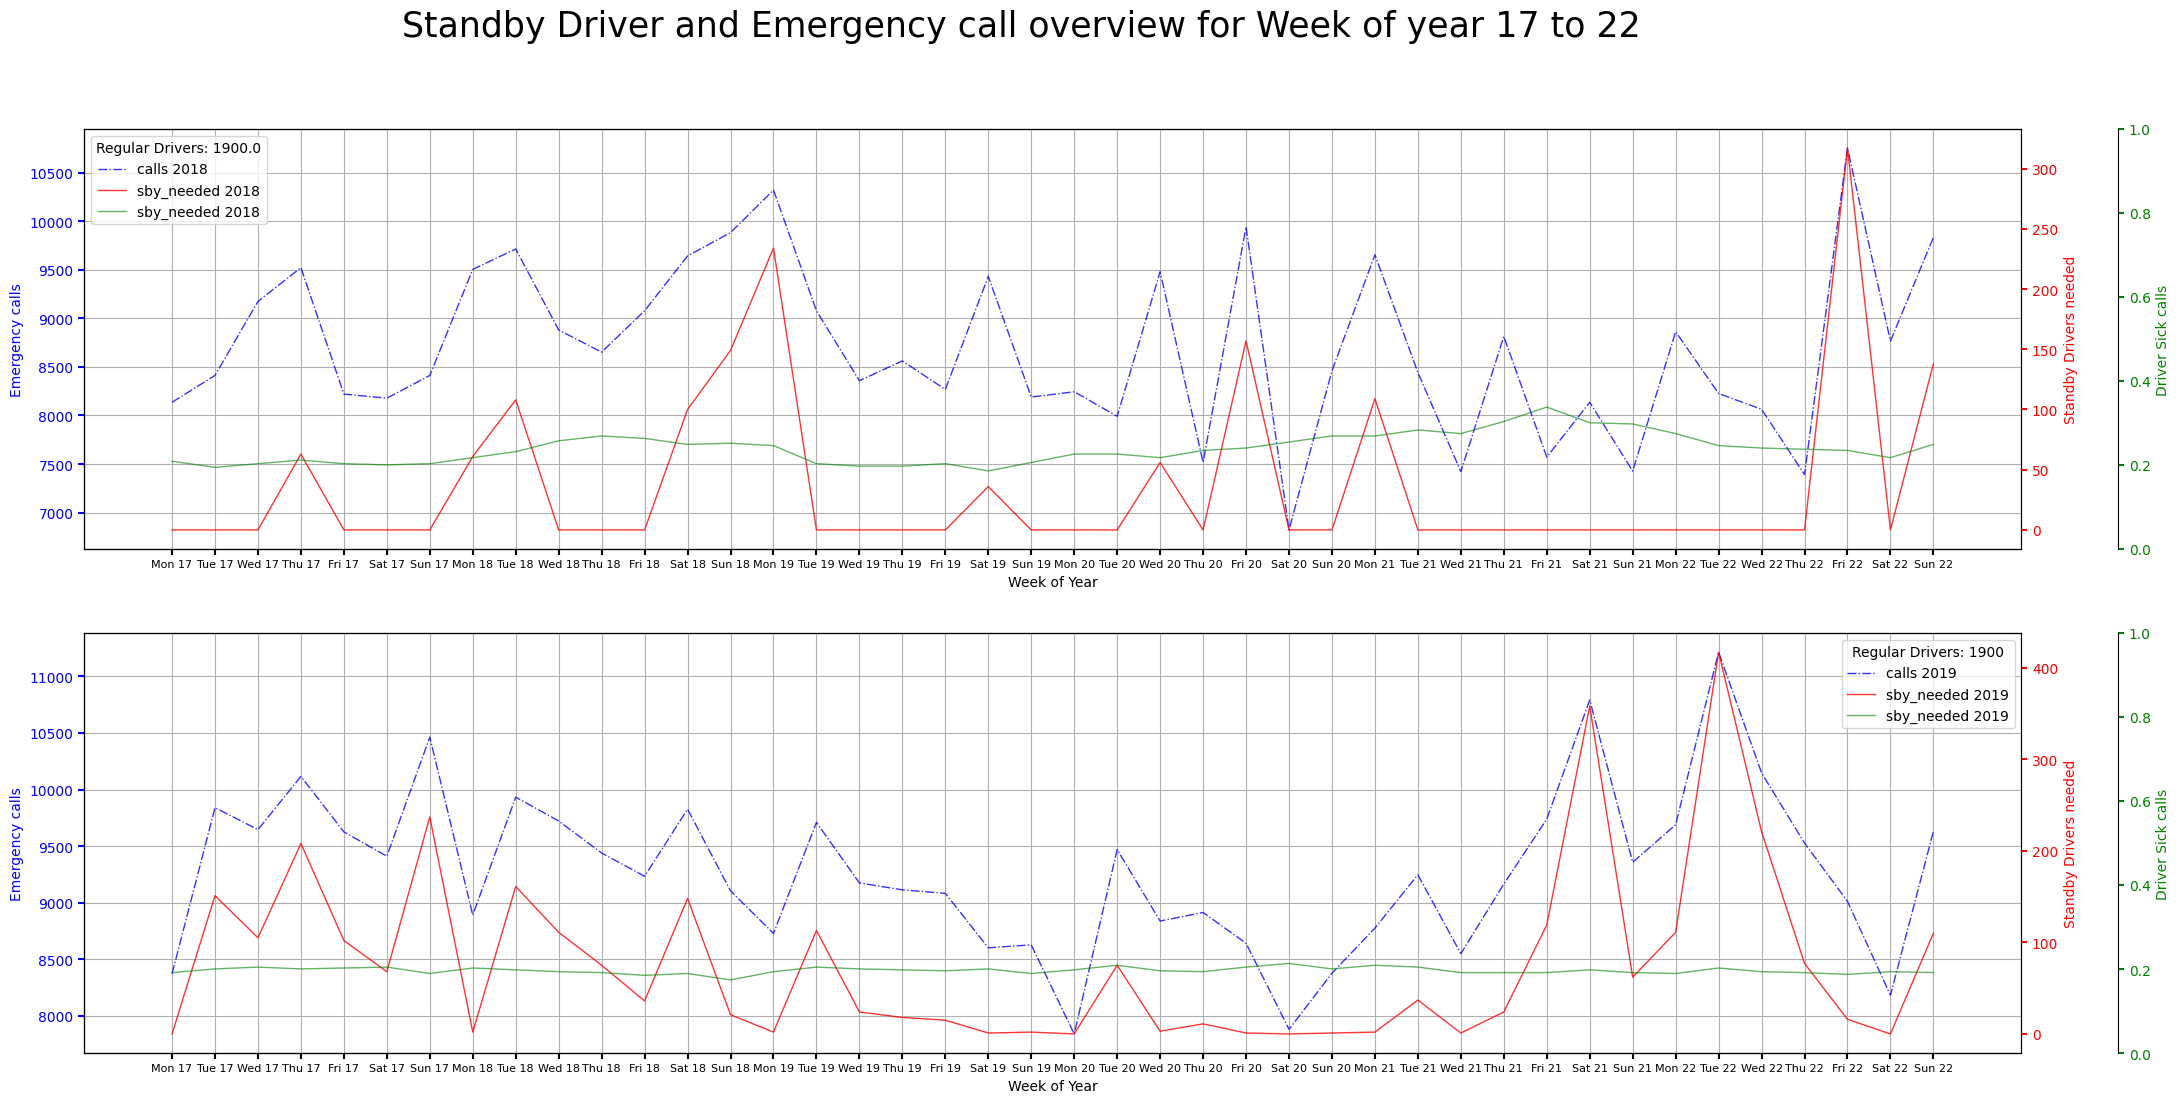

In [ ]:
visualize_calls_sby_need_3(df_dict=pred_df_dict, year_array=['2018','2019'], weekofyear_start=pred_start_date_woy, weekofyear_end=22)